# Import Libraries & load data

In [5]:
# !pip install pandas 

import pandas as pd
pd.__version__
# !pip install --upgrade pandas 
# 우분투가 1.3.5라 맞춰주기..코랩이

'1.3.3'

In [6]:
# from google.colab import drive
# drive.mount('/gdrive')

import pickle
import time

import re
import os
import json

import numpy as np
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
# from tensorflow.python.keras.preprocessing.sequence import pad_sequences
# from tensorflow.python.keras.preprocessing.text import Tokenizer

import nltk
# nltk.download('all')
from nltk.corpus import wordnet as wn

In [3]:
# specific term 교체된 data.
with open('/gdrive/MyDrive/movie_predict/DF/Asepct/reviews_after_aspect_term_change','rb') as fr:
  df = pickle.load(fr)
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/gdrive/MyDrive/movie_predict/DF/Asepct/reviews_after_aspect_term_change'

### Review to Sentence

In [19]:
from tqdm import tqdm
tqdm.pandas()

df['cleaned_contents'] = df['cleaned_contents'].progress_apply(lambda x: str(x)) #str 아닌 에러.
df['sents'] =  df['cleaned_contents'].progress_apply(lambda sents: nltk.sent_tokenize(sents))
df
df['sents'].loc[0]


  2%|▏         | 18971/1045157 [00:04<04:25, 3866.76it/s]


KeyboardInterrupt: ignored

In [6]:
# 필요 없는 컬럼 추리기
df = df[['header', 'contents', 'star', 'helpful',
       'in_n_weeks', 'Movie_code', 'sentiment', 'train', 'cleaned_contents',
       'sents']]

In [20]:
# review2sent 전 check point
path = '/gdrive/MyDrive/movie_predict/DF/temp/before_review2sent'

# with open(path,'wb') as fw:
#     pickle.dump(df,fw)
with open(path,'rb') as fr:
    review = pickle.load(fr)

# 로컬용 Check Point

In [4]:
# specific term 교체된 data.
path = r'C:\Users\MinSeong\Desktop\내 연구 ABSA코드\before_review2sent'
with open(path,'rb') as fr:
  review = pickle.load(fr)
review.head()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\MinSeong\\Desktop\\내 연구 ABSA코드\\before_review2sent'

In [25]:
review.reset_index(inplace=True)
review

,index,header,contents,star,helpful,in_n_weeks,Movie_code,sentiment,train,cleaned_contents,sents
0,0,Actually quite funny without Chris Tucker\n,Next Friday is actually pretty funny even thou...,1.0,['17 out of 25'],after 4 weeks,0195945,1,1,the movie is actually pretty funny even though...,[the movie is actually pretty funny even thoug...
1,1,Some good belly laughs\n,It is not easy to sit through the whole movie ...,0.7,['4 out of 5'],after 4 weeks,0195945,1,1,it is not easy to sit through the whole movie ...,[it is not easy to sit through the whole movie...
2,2,I loved that movie\n,Next Friday is a movie i enjoyed to see all 4 ...,1.0,['5 out of 7'],after 4 weeks,0195945,1,1,the movie is a movie i enjoyed to see all 4 ti...,[the movie is a movie i enjoyed to see all 4 t...
3,3,Worst of the trilogy but still pretty funny a...,"Rated R for Language,Drug Use and Sexual Conte...",0.8,['8 out of 13'],after 4 weeks,0195945,1,1,"rated r for language,drug use and sexual conte...","[rated r for language,drug use and sexual cont..."
4,4,will there be another next time???\n,"i hope so. friday part one, might been more fu...",0.8,['5 out of 10'],after 4 weeks,0195945,1,1,"i hope so. friday part one, might been more fu...","[i hope so., friday part one, might been more ..."
...,...,...,...,...,...,...,...,...,...,...,...
1045152,1045152,The Clash\n,A study in tolerance and values as they clash ...,0.7,['3 out of 5'],after 4 weeks,5974388,1,1,a study in tolerance and values as they clash ...,[a study in tolerance and values as they clash...
1045153,1045153,"Tiresome Throwback To The 80's, We've All Mov...",In BetweenThis movie had the feel of a student...,0.4,['1 out of 2'],after 4 weeks,5974388,0,1,the moviethis movie had the feel of a student ...,[the moviethis movie had the feel of a student...
1045154,1045154,An Intimate Slice of Three Palestinian Person...,I love this film for three reasons: the cinema...,1.0,['1 out of 3'],after 4 weeks,5974388,1,1,i love this film for three reasons: the cinema...,[i love this film for three reasons: the cinem...
1045155,1045155,Very Creepy Journey!!!\n,This was one of those movies very well done. I...,0.8,['0 out of 1'],after 4 weeks,3630918,1,0,this was one of those movies very well done. i...,"[this was one of those movies very well done.,..."


In [26]:
review = review[~(review['in_n_weeks'] == 'after 4 weeks')]

In [27]:
review['doc_id'] = review['index']
review.drop(['index'],axis = 1, inplace = True)
review

<ipython-input-27-fa9c8905ac06>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review['doc_id'] = review['index']
C:\Users\MinSeong\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,header,contents,star,helpful,in_n_weeks,Movie_code,sentiment,train,cleaned_contents,sents,doc_id
15,"Friday was badass, Next Friday is just bad\n",Ice Cube made a major blunder when he did not ...,0.4,['0 out of 0'],4,0195945,0,1,the actor made a major blunder when he did not...,[the actor made a major blunder when he did no...,15
16,much different compared to the first one.\n,i was suprised to see this be as good as the f...,0.8,['0 out of 0'],0,0195945,1,1,i was suprised to see this be as good as the f...,[i was suprised to see this be as good as the ...,16
37,It's all about Next Friday!\n,Next Friday is completely worth it! Everyone ...,1.0,['0 out of 1'],1,0195945,1,1,the movie is completely worth it! everyone sh...,"[the movie is completely worth it!, everyone s...",37
38,An Equal Sequel\n,Next Friday was probably one of the better seq...,1.0,['0 out of 1'],1,0195945,1,1,the movie was probably one of the better seque...,[the movie was probably one of the better sequ...,38
39,"Just as good as the first one, if not more so\n",Who says the sequel is never as good as the or...,0.7,['0 out of 1'],0,0195945,1,1,who says the sequel is never as good as the or...,[who says the sequel is never as good as the o...,39
...,...,...,...,...,...,...,...,...,...,...,...
1045145,Breaking with tradition\n,The Israeli film Bar Bahar was shown in the US...,0.9,['15 out of 19'],0,5974388,1,1,the israeli film bar bahar was shown in the us...,[the israeli film bar bahar was shown in the u...,1045145
1045146,"Not a lot of action, but well presented\n","I don't know what ""Bar Bahr"" means in Arabic, ...",0.8,['17 out of 22'],0,5974388,1,1,"i don't know what ""bar bahr"" means in arabic, ...","[i don't know what ""bar bahr"" means in arabic,...",1045146
1045147,Striving for independence\n,"The subject matter intrigued me a lot, and the...",0.9,['7 out of 9'],0,5974388,1,1,"the subject matter intrigued me a lot, and the...","[the subject matter intrigued me a lot, and th...",1045147
1045150,Three Palestinian women in Tel Aviv--differen...,"In Between, directed by Maysaloun Hamoud, cont...",1.0,['7 out of 11'],0,5974388,1,1,"the movie, directed by the director, continues...","[the movie, directed by the director, continue...",1045150


In [31]:
review.reset_index(drop = True,inplace = True)
review

,header,contents,star,helpful,in_n_weeks,Movie_code,sentiment,train,cleaned_contents,sents,doc_id
0,"Friday was badass, Next Friday is just bad\n",Ice Cube made a major blunder when he did not ...,0.4,['0 out of 0'],4,0195945,0,1,the actor made a major blunder when he did not...,[the actor made a major blunder when he did no...,15
1,much different compared to the first one.\n,i was suprised to see this be as good as the f...,0.8,['0 out of 0'],0,0195945,1,1,i was suprised to see this be as good as the f...,[i was suprised to see this be as good as the ...,16
2,It's all about Next Friday!\n,Next Friday is completely worth it! Everyone ...,1.0,['0 out of 1'],1,0195945,1,1,the movie is completely worth it! everyone sh...,"[the movie is completely worth it!, everyone s...",37
3,An Equal Sequel\n,Next Friday was probably one of the better seq...,1.0,['0 out of 1'],1,0195945,1,1,the movie was probably one of the better seque...,[the movie was probably one of the better sequ...,38
4,"Just as good as the first one, if not more so\n",Who says the sequel is never as good as the or...,0.7,['0 out of 1'],0,0195945,1,1,who says the sequel is never as good as the or...,[who says the sequel is never as good as the o...,39
...,...,...,...,...,...,...,...,...,...,...,...
359911,Breaking with tradition\n,The Israeli film Bar Bahar was shown in the US...,0.9,['15 out of 19'],0,5974388,1,1,the israeli film bar bahar was shown in the us...,[the israeli film bar bahar was shown in the u...,1045145
359912,"Not a lot of action, but well presented\n","I don't know what ""Bar Bahr"" means in Arabic, ...",0.8,['17 out of 22'],0,5974388,1,1,"i don't know what ""bar bahr"" means in arabic, ...","[i don't know what ""bar bahr"" means in arabic,...",1045146
359913,Striving for independence\n,"The subject matter intrigued me a lot, and the...",0.9,['7 out of 9'],0,5974388,1,1,"the subject matter intrigued me a lot, and the...","[the subject matter intrigued me a lot, and th...",1045147
359914,Three Palestinian women in Tel Aviv--differen...,"In Between, directed by Maysaloun Hamoud, cont...",1.0,['7 out of 11'],0,5974388,1,1,"the movie, directed by the director, continues...","[the movie, directed by the director, continue...",1045150


In [32]:
# 로컬로는 1,2 진행.
file_name = 'review1tosent'     #체크
review1 = review[:60000]
review2 = review[60000:120000] 
review3 = review[120000:180000]
review4 = review[240000:300000]  
review5 = review[300000:]

rv = review1               #체크
rv

,header,contents,star,helpful,in_n_weeks,Movie_code,sentiment,train,cleaned_contents,sents,doc_id
0,"Friday was badass, Next Friday is just bad\n",Ice Cube made a major blunder when he did not ...,0.4,['0 out of 0'],4,0195945,0,1,the actor made a major blunder when he did not...,[the actor made a major blunder when he did no...,15
1,much different compared to the first one.\n,i was suprised to see this be as good as the f...,0.8,['0 out of 0'],0,0195945,1,1,i was suprised to see this be as good as the f...,[i was suprised to see this be as good as the ...,16
2,It's all about Next Friday!\n,Next Friday is completely worth it! Everyone ...,1.0,['0 out of 1'],1,0195945,1,1,the movie is completely worth it! everyone sh...,"[the movie is completely worth it!, everyone s...",37
3,An Equal Sequel\n,Next Friday was probably one of the better seq...,1.0,['0 out of 1'],1,0195945,1,1,the movie was probably one of the better seque...,[the movie was probably one of the better sequ...,38
4,"Just as good as the first one, if not more so\n",Who says the sequel is never as good as the or...,0.7,['0 out of 1'],0,0195945,1,1,who says the sequel is never as good as the or...,[who says the sequel is never as good as the o...,39
...,...,...,...,...,...,...,...,...,...,...,...
59995,Redundant\n,Redundant.It really says it all. Nothing new w...,0.2,['0 out of 0'],2,0242653,0,1,redundant.it really says it all. nothing new w...,"[redundant.it really says it all., nothing new...",205922
59996,No Tights or Capes\n,"Man, what a lot of whimpering!Hey, everybody.....",0.7,['0 out of 0'],1,0242653,1,1,"man, what a lot of whimpering!hey, everybody.....","[man, what a lot of whimpering!hey, everybody....",205923
59997,Heres hoping for an origami unicorn somewhere\n,roll up roll up for the fesvtial of films that...,0.4,['0 out of 0'],1,0242653,0,1,roll up roll up for the fesvtial of films that...,[roll up roll up for the fesvtial of films tha...,205924
59998,Doesnt quite quench my thirst!\n,"Ok, the second one had its flaws but as it fil...",0.8,['0 out of 0'],1,0242653,1,1,"ok, the second one had its flaws but as it fil...","[ok, the second one had its flaws but as it fi...",205925


In [ ]:
# sents len 만큼 반복하며 sent 채워넣기
from tqdm import tqdm
tqdm.pandas()

review_sents = pd.DataFrame(data = [], columns = review.columns)
review_sents


#1) review_sents에 review 기본정보 sents 갯수만큼 추가
def fill_df(row):
  for i in range(len(row['sents'])):
    global review_sents
    #2) sents 배치
    sent = row['sents'][i]
    row['sent'] = sent
    review_sents = review_sents.append(row)
    
 

rv.progress_apply(lambda row: fill_df(row), axis = 1)
review_sents

 25%|██████████████████▎                                                       | 14817/60000 [22:03<2:07:15,  5.92it/s]

In [6]:
import os

os.chdir(r'C:\Users\MinSeong\Desktop\내 연구 ABSA코드\review2sent(movie-specific)')
# with open(file_name,'wb') as fw:
#     pickle.dump(review_sents,fw)
with open(file_name,'rb') as fr:
    d = pickle.load(fr)
d

FileNotFoundError: [WinError 3] 지정된 경로를 찾을 수 없습니다: 'C:\\Users\\MinSeong\\Desktop\\내 연구 ABSA코드\\review2sent(movie-specific)'

# 1.Training Word2Vec on the review data

## data gathering

In [12]:
import pandas as pd
import os
import pickle
sent_df = pd.DataFrame(data = [])
os.chdir(r'C:\Users\MinSeong\Desktop\movie_pred_code\review2sent')
file_names = ['review1tosent','review2tosent','review3tosent','review4tosent','review5tosent','af4review1tosent','af4review2tosent','af4review3tosent']

for file_name in file_names:    
    with open(file_name,'rb') as fr:
        d = pickle.load(fr)
        d.reset_index(inplace = True, drop = True)
    sent_df = pd.concat([d,sent_df],axis = 0)
    sent_df.reset_index(inplace = True, drop = True)

FileNotFoundError: [WinError 3] 지정된 경로를 찾을 수 없습니다: 'C:\\Users\\MinSeong\\Desktop\\movie_pred_code\\review2sent'

In [38]:
# sent_df.info() # 결측치 확인 기능사라진듯

# sent_df.isnull().sum()
sent_df.drop('level_0',axis = 1,inplace = True)
sent_df.isnull().sum() # 결측치 없이 잘 합쳐짐.

header              0
contents            0
star                0
helpful             0
in_n_weeks          0
Movie_code          0
sentiment           0
train               0
cleaned_contents    0
sents               0
doc_id              0
sent                0
dtype: int64

## data pre-processing

https://medium.com/swlh/how-to-train-word2vec-model-using-gensim-library-115b35440c90
참조

In [13]:
# # load practice 용
# path = r'C:\Users\user\Desktop\ABSA1 w2v 구현용\w2vpractice'

# with open(path,'rb') as fr:
#     review = pickle.load(fr)
review['sent']

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\user\\Desktop\\ABSA1 w2v 구현용\\w2vpractice'

In [40]:
sent_df

,header,contents,star,helpful,in_n_weeks,Movie_code,sentiment,train,cleaned_contents,sents,doc_id,sent
0,Not worth your time!\n,Really boring storyline..The acting was sub-pa...,0.3,['0 out of 1'],after 4 weeks,1045655,0,1,really boring storyline..the acting was sub-pa...,[really boring storyline..the acting was sub-p...,602902,really boring storyline..the acting was sub-pa...
1,not very scary\n,This film has so many dream sequence scares th...,0.4,['0 out of 1'],after 4 weeks,1045655,0,1,this film has so many dream sequence scares th...,[this film has so many dream sequence scares t...,602903,this film has so many dream sequence scares th...
2,not very scary\n,This film has so many dream sequence scares th...,0.4,['0 out of 1'],after 4 weeks,1045655,0,1,this film has so many dream sequence scares th...,[this film has so many dream sequence scares t...,602903,just a so-so thriller.
3,A poorly executed made for TV horror movie\n,This could have been a decent movie. If it was...,0.4,['0 out of 1'],after 4 weeks,1045655,0,1,this could have been a decent movie. if it was...,"[this could have been a decent movie., if it w...",602904,this could have been a decent movie.
4,A poorly executed made for TV horror movie\n,This could have been a decent movie. If it was...,0.4,['0 out of 1'],after 4 weeks,1045655,0,1,this could have been a decent movie. if it was...,"[this could have been a decent movie., if it w...",602904,if it was a made for tv movie the acting wasn'...
...,...,...,...,...,...,...,...,...,...,...,...,...
9073568,Neo tries to save the human race from the mac...,The story of the movie was told very well. I ...,0.8,['0 out of 0'],1,0242653,1,1,the story of the movie was told very well. i ...,"[the story of the movie was told very well., i...",205926,"it picked up were the second left off, and too..."
9073569,Neo tries to save the human race from the mac...,The story of the movie was told very well. I ...,0.8,['0 out of 0'],1,0242653,1,1,the story of the movie was told very well. i ...,"[the story of the movie was told very well., i...",205926,the only disappointing thing to me was the lac...
9073570,Neo tries to save the human race from the mac...,The story of the movie was told very well. I ...,0.8,['0 out of 0'],1,0242653,1,1,the story of the movie was told very well. i ...,"[the story of the movie was told very well., i...",205926,the most enjoyable thing to see in the first t...
9073571,Neo tries to save the human race from the mac...,The story of the movie was told very well. I ...,0.8,['0 out of 0'],1,0242653,1,1,the story of the movie was told very well. i ...,"[the story of the movie was told very well., i...",205926,"they were truly missed from this, the final in..."


### removing links & punctuation & eng only

In [41]:
def remove_link_punc(string):
  # removing links # 정상 작동
  temp_string = re.sub('http[s]?://(?:[a-zA-Z]|[0–9]|[$-_@.&+]|(?:%[0–9a-fA-F][0–9a-fA-F]))+', ' ', string)
  
  # removing all everything except a-z english letters # 작동
  regex = re.compile('[^a-zA-Z]')
  temp_string = regex.sub(' ', temp_string)

  # removing extra spaces #작동
  clean_string = re.sub(' +', ' ', temp_string).lower()

  return clean_string

In [42]:
from tqdm import tqdm
tqdm.pandas()

sent_df['remove_link_punc'] = sent_df['sent'].progress_apply(lambda sent: remove_link_punc(sent))
sent_df['remove_link_punc']

100%|█████████████████████████████████████████████████████████████████████| 9073573/9073573 [01:54<00:00, 79409.38it/s]


0          really boring storyline the acting was sub par...
1          this film has so many dream sequence scares th...
2                                     just a so so thriller 
3                       this could have been a decent movie 
4          if it was a made for tv movie the acting wasn ...
                                 ...                        
9073568    it picked up were the second left off and took...
9073569    the only disappointing thing to me was the lac...
9073570    the most enjoyable thing to see in the first t...
9073571    they were truly missed from this the final ins...
9073572    all in all i give revolutions a out of i give ...
Name: remove_link_punc, Length: 9073573, dtype: object

In [18]:
# checkpoint
import os
import pickle
# os.chdir(r'C:\Users\MinSeong\Desktop\movie_pred_code\review2sent')
os.chdir(r'C:\Users\ywy\Desktop\min\movie_pred\pre-processed_df')

# with open("pre_df_remove_link_punc",'wb') as fw:
#     pickle.dump(sent_df,fw)
with open("pre_df_remove_link_punc",'rb') as fr:
    pre_df = pickle.load(fr)

In [21]:
temp = pre_df.iloc[:100]
temp

,header,contents,star,helpful,in_n_weeks,Movie_code,sentiment,train,cleaned_contents,sents,doc_id,sent,remove_link_punc
0,Not worth your time!\n,Really boring storyline..The acting was sub-pa...,0.3,['0 out of 1'],after 4 weeks,1045655,0,1,really boring storyline..the acting was sub-pa...,[really boring storyline..the acting was sub-p...,602902,really boring storyline..the acting was sub-pa...,really boring storyline the acting was sub par...
1,not very scary\n,This film has so many dream sequence scares th...,0.4,['0 out of 1'],after 4 weeks,1045655,0,1,this film has so many dream sequence scares th...,[this film has so many dream sequence scares t...,602903,this film has so many dream sequence scares th...,this film has so many dream sequence scares th...
2,not very scary\n,This film has so many dream sequence scares th...,0.4,['0 out of 1'],after 4 weeks,1045655,0,1,this film has so many dream sequence scares th...,[this film has so many dream sequence scares t...,602903,just a so-so thriller.,just a so so thriller
3,A poorly executed made for TV horror movie\n,This could have been a decent movie. If it was...,0.4,['0 out of 1'],after 4 weeks,1045655,0,1,this could have been a decent movie. if it was...,"[this could have been a decent movie., if it w...",602904,this could have been a decent movie.,this could have been a decent movie
4,A poorly executed made for TV horror movie\n,This could have been a decent movie. If it was...,0.4,['0 out of 1'],after 4 weeks,1045655,0,1,this could have been a decent movie. if it was...,"[this could have been a decent movie., if it w...",602904,if it was a made for tv movie the acting wasn'...,if it was a made for tv movie the acting wasn ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,"Did We Really Need Another Bad ""Spawn Of The ...",I suppose the lesson to be learned here is nev...,0.2,['0 out of 2'],after 4 weeks,1045655,0,1,i suppose the lesson to be learned here is nev...,[i suppose the lesson to be learned here is ne...,602911,the whole thing slowly reveals what evil influ...,the whole thing slowly reveals what evil influ...
96,"Did We Really Need Another Bad ""Spawn Of The ...",I suppose the lesson to be learned here is nev...,0.2,['0 out of 2'],after 4 weeks,1045655,0,1,i suppose the lesson to be learned here is nev...,[i suppose the lesson to be learned here is ne...,602911,it all leads up to a closing graduations scene...,it all leads up to a closing graduations scene...
97,"Did We Really Need Another Bad ""Spawn Of The ...",I suppose the lesson to be learned here is nev...,0.2,['0 out of 2'],after 4 weeks,1045655,0,1,i suppose the lesson to be learned here is nev...,[i suppose the lesson to be learned here is ne...,602911,big news - the world's going to hell!,big news the world s going to hell
98,"Did We Really Need Another Bad ""Spawn Of The ...",I suppose the lesson to be learned here is nev...,0.2,['0 out of 2'],after 4 weeks,1045655,0,1,i suppose the lesson to be learned here is nev...,[i suppose the lesson to be learned here is ne...,602911,what do we need molly for?,what do we need molly for


In [24]:
from nltk.stem import WordNetLemmatizer

import nltk
# nltk.download('wordnet')
# nltk.download('stopwords')


In [31]:
from nltk.stem import PorterStemmer
from tqdm import tqdm
tqdm.pandas()

# from 교수님 MBA 코드. 11주
def preprocessing(text):   #Preprocessing
    # tokenize into words
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)] 
   
    # remove stopwords
    stop = stopwords.words('english')
    tokens = [token for token in tokens if token not in stop]
    
    # remove words less than three letters
    tokens = [word for word in tokens if len(word) >= 3]
    
    # lower capitalization
    tokens = [word.lower() for word in tokens]
    
    # lemmatize
    lmtzr = WordNetLemmatizer()
    tokens = [lmtzr.lemmatize(word) for word in tokens]
    preprocessed_text = tokens
#     preprocessed_text= ' '.join(tokens)

#     # Stemming
#     stemmer = PorterStemmer()
#     preprocessed_text = [stemmer.stem(w) for w in preprocessed_text]
    
    return preprocessed_text
# temp['review_pre']=temp['remove_link_punc'].progress_apply(lambda x: preprocessing(x))
# temp
pre_df['review_pre']=pre_df['remove_link_punc'].progress_apply(lambda x: preprocessing(x))

100%|████████████████████████████████████████████████████████████████████| 9073573/9073573 [1:47:06<00:00, 1411.88it/s]


In [ ]:
# temp
word = "aaa aa aaaaaaah wonderful land of oz zz."
preprocessing(word)

In [32]:
pre_df.reset_index(drop = True, inplace = True)

In [33]:
# pre-processed df 저장,로드
import os
import pickle
os.chdir(r'C:\Users\ywy\Desktop\min\movie_pred\pre-processed_df')

with open("pre_df",'wb') as fw:
    pickle.dump(pre_df,fw)
with open("pre_df",'rb') as fr:
    pre_df = pickle.load(fr)


# 이렇게 원래 작성되어있었음
# with open("pre_df",'rb') as fr:
#     w2v_list = pickle.load(fr)

In [34]:
# 한 리스트로 합치기 연습
# temp = review['review_pre'][:3]
sents = []
def list_hoarder(list_sent):
    global sents
    sents.append(list_sent)

pre_df['review_pre'].progress_apply(lambda list_sent: list_hoarder(list_sent))

100%|███████████████████████████████████████████████████████████████████| 9073573/9073573 [00:09<00:00, 1006424.10it/s]


0          None
1          None
2          None
3          None
4          None
           ... 
9073568    None
9073569    None
9073570    None
9073571    None
9073572    None
Name: review_pre, Length: 9073573, dtype: object

In [35]:
# 총 단어 수 세기

mtli = []


from tqdm import tqdm
tqdm.pandas()

pre_df['review_pre'].progress_apply(lambda vocli: mtli.extend(vocli))
len(set(mtli)) # 312109개 단어 --> unique한 단어 248789

100%|████████████████████████████████████████████████████████████████████| 9073573/9073573 [00:09<00:00, 943707.38it/s]


312109

In [36]:
# word2vec input 저장
# os.chdir(r'C:\Users\MinSeong\Desktop\movie_pred_code\review2sent')

os.chdir(r'C:\Users\ywy\Desktop\min\movie_pred\w2v에 나온 단어로만 변환')
with open("w2vinput",'wb') as fw:
    pickle.dump(sents,fw)
with open("w2vinput",'rb') as fr:
    w2v_list = pickle.load(fr)

In [37]:
len(w2v_list)

9073573

## Word2vec Training

In [38]:
# !pip install gensim
import numpy as np
import time
begin = time.time()

from gensim.models import Word2Vec
model = Word2Vec(sentences=w2v_list, vector_size=300, window=10, min_count=4, workers=4,sg = 1)
# !pip install gensim
done = time.time()
# 20만 sentence:
secs = done - begin
print(f"{np.trunc(secs / 60)}분 소요") # 1분 소요. 넉넉히 1 시간 잡으면 전체 학습할듯.

20.0분 소요


In [39]:
import os
os.chdir(r'C:\Users\ywy\Desktop\min\movie_pred\w2v에 나온 단어로만 변환')

#word2vec 저장하는 코드 구현
model.save('word2vec.model') # 모델 저장


from gensim.models import Word2Vec
model = Word2Vec.load('word2vec.model')# 모델 로드
model.wv['princess'] # 워드 벡터 구하기

model.wv.similarity('princess', 'queen') #코사인 유사도 구하기
model.wv.most_similar('princess') # 그냥 가장 가까운 것.. 
# wordlist = list(model.wv.vocab)
# len(wordlist)

[('monoke', 0.6201863884925842),
 ('rapunzel', 0.5700233578681946),
 ('kida', 0.5629846453666687),
 ('mononoke', 0.5460004210472107),
 ('nefertiri', 0.542016863822937),
 ('mononoki', 0.5371865630149841),
 ('kaurwaki', 0.5356416702270508),
 ('kaguya', 0.5345764756202698),
 ('prince', 0.5320760011672974),
 ('tilde', 0.5279681086540222)]

In [40]:
# wordlist = list(model.wv.vocab)
# len(wordlist)

len(model.wv.key_to_index.keys()) # 74858

98331

# 2. (구)STM 구축

DTM: DTM은 Aspect 별로 Word와 유사도가 나타난 행렬.

In [16]:
# 학습된 워투백 가져오기
# 모델 로드
import os
os.chdir(r'C:\Users\MinSeong\Desktop\movie_pred_code\review2sent')
from gensim.models import Word2Vec
model = Word2Vec.load('word2vec.model')
# model.wv.most_similar('music') # 도 해볼만할듯.. soundtrack
model.wv.most_similar('song')

[('lyric', 0.8203268647193909),
 ('tune', 0.8048673868179321),
 ('sung', 0.7774114608764648),
 ('catchy', 0.7575063705444336),
 ('music', 0.7536646127700806),
 ('hummable', 0.7187243700027466),
 ('melody', 0.7120361328125),
 ('mehndi', 0.695824384689331),
 ('daler', 0.6900125741958618),
 ('singing', 0.6878414154052734)]

In [17]:
model.wv.most_similar('music')

[('soundtrack', 0.8338460922241211),
 ('song', 0.7536646723747253),
 ('instrumentals', 0.7218025922775269),
 ('score', 0.7157046794891357),
 ('orchestral', 0.7143045663833618),
 ('djawadi', 0.7068655490875244),
 ('enya', 0.6959042549133301),
 ('chowta', 0.6905639171600342),
 ('radwimps', 0.6836745738983154),
 ('tune', 0.6818971037864685)]

In [18]:
model.wv.similarity('song', 'music')

0.75366455

In [19]:
model.wv.most_similar('actor')

[('hunham', 0.7755576372146606),
 ('eliana', 0.7705337405204773),
 ('phiefer', 0.7519032955169678),
 ('pheifer', 0.7504189610481262),
 ('shipka', 0.7489644289016724),
 ('guirira', 0.7460935115814209),
 ('unbeliavably', 0.7456396818161011),
 ('tyresse', 0.7408440113067627),
 ('gillenhaal', 0.7403602600097656),
 ('biedel', 0.7382725477218628)]

In [20]:
model.wv.similarity('actor', 'eminem')

0.3005118

In [7]:
# 학습된 uniqe한 단어 개수
wordlist = list(model.wv.vocab)
len(wordlist)

98331

In [ ]:
wordlist

In [10]:
aspects = ['actor','director','plot','music','movie']
temp_wordlist = wordlist[:3]# 테스트용

# 학습된 단어 수
# len(model.wv) # pretrained는 몇? 2B tweets, 100B words.. # 안됨
# 모든 단어의 리스트
# len(model.wv.index_to_key) # 일케하면 리스트로 모든 단어 나옴! -? 안나옴

# 모든 단어의 딕셔너리
# model.wv.key_to_index # 일케하면 딕셔너리로 모든 단어 나옴! -? 안나옴

In [11]:
len(wordlist)

158289

## Similarity 계산

In [96]:
import numpy as np

aspects = ['actor','director','plot','music','movie']
similarity_actor = []
similarity_director = []
similarity_plot = []
similarity_music = []
similarity_movie = []
sim_aspects = [similarity_actor,similarity_director,similarity_plot,similarity_music,similarity_movie]
for i in range(len(sim_aspects)):    
    for word in wordlist:
        sim = model.wv.similarity(aspects[i], word)
        sim_aspects[i].append(sim)
    sim_aspects[i] = np.array(sim_aspects[i])


In [97]:
# sim_aspects
# ex = np.concatenate((similarity_actor, similarity_actor), axis=1)
sim_mat = np.vstack((sim_aspects[0],sim_aspects[1],sim_aspects[2],sim_aspects[3],sim_aspects[4]))
sim_mat.shape

(5, 158289)

In [98]:
sim_mat

array([[0.4066485 , 0.26143655, 0.30132708, ..., 0.5584969 , 0.45615238,
        0.40876296],
       [0.41081524, 0.22787128, 0.3060823 , ..., 0.39206785, 0.38702014,
        0.4330998 ],
       [0.41069815, 0.44076085, 0.83058995, ..., 0.311643  , 0.23223831,
        0.37742528],
       [0.3820657 , 0.24505723, 0.36896232, ..., 0.34344748, 0.22692107,
        0.33457625],
       [0.5876034 , 0.48630905, 0.52402693, ..., 0.41287237, 0.36167035,
        0.46235028]], dtype=float32)

## STM 구축 --> HALT

In [7]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [17]:
temp

In [10]:
te2 = temp[:10]

te = TransactionEncoder()
te_ary = te.fit(te2).transform(te2) # series를 넣어도 잘 작동..
te_ary.shape
te_ary

TypeError: unhashable type: 'slice'

###  sparse matrix 활용한 STM 구축

In [6]:
# temp

차원 --> 단어 의 연관규칙임.

In [3]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# 행이 sent, 열이 단어인 연관규칙 만들어야함.
pre_df['review_pre'] # preprocessed 된 review


0          [really, boring, storyline, acting, sub, par, ...
1          [film, many, dream, sequence, scare, time, som...
2                                                 [thriller]
3                                     [could, decent, movie]
4          [made, movie, acting, bad, story, incredibly, ...
                                 ...                        
9073568    [picked, second, left, took, without, disappoi...
9073569                 [disappointing, thing, lack, matrix]
9073570    [enjoyable, thing, see, first, two, movie, wat...
9073571     [truly, missed, final, installment, masterpiece]
9073572                    [give, revolution, give, trilogy]
Name: review_pre, Length: 9073573, dtype: object

In [81]:
# 짤라서 transform, 한번에 붙이기..
te2 = pre_df['review_pre'].loc[:10]
te_ary = te.fit(pre_df['review_pre']).transform(te2) # seies가능, fit만 잘 되면 여러번 분할하여 transform 가능. 
stm2 = pd.DataFrame(te_ary, columns=te.columns_)

In [83]:
stm2.columns # 왜 이런.. 리뷰가,,? fit 할 때 잘못 된거.-->stemming 시도해볼 수 있을 듯.

Index(['aa', 'aaa', 'aaaa', 'aaaaa', 'aaaaaa', 'aaaaaaa', 'aaaaaaaa',
       'aaaaaaaaa', 'aaaaaaaaaaa', 'aaaaaaaaaaaa',
       ...
       'zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz',
       'zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz',
       'zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz',
       'zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz',
       'zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz',
       'zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzit',
       'zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz',
       'zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz',
       'zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz

In [15]:
# aaaa zzzz들 나온 리뷰 찾아보기


def aaa(sents):
    if "aaaaa" in sents:
        return True
tf = pre_df['review_pre'].apply(lambda sents:aaa(sents) )
pre_df[tf == True]

,header,contents,star,helpful,in_n_weeks,Movie_code,sentiment,train,cleaned_contents,sents,doc_id,sent,remove_link_punc,review_pre
577931,Fantastic film well worth the score great CAS...,Fantastic film great who done it with humour a...,0.9,['0 out of 2'],after 4 weeks,8946378,1,1,fantastic film great who done it with humour a...,[fantastic film great who done it with humour ...,754640,fantastic film great who done it with humour a...,fantastic film great who done it with humour a...,"[fantastic, film, great, done, humour, grippin..."
1233896,AMAZING!\n,I LOVE IT! AAAAA!!-\nThe Hulk looking like a f...,1.0,['4 out of 6'],after 4 weeks,0848228,1,0,i love it! aaaaa!!-\nthe hulk looking like a f...,"[i love it!, aaaaa!, !-\nthe hulk looking like...",861436,aaaaa!,aaaaa,[aaaaa]
1616813,What a Rush\n,"Rush is Ron Howard's best up to date, a viscer...",1.0,['2 out of 4'],after 4 weeks,1979320,1,0,"the movie is the director's best up to date, a...","[the movie is the director's best up to date, ...",920186,what matters is the movie is an un-missable mo...,what matters is the movie is an un missable mo...,"[matter, movie, missable, movie, hence, quote,..."
7126798,"I wish I was Lois Lane, I wish Superman is re...","I watched Superman Returns today, and there's ...",0.9,['8 out of 13'],3,0348150,1,1,"i watched the movie today, and there's only on...","[i watched the movie today, and there's only o...",497266,"aaaaa!!!!""",aaaaa,[aaaaa]
7819302,"I wish I was Lois Lane, I wish Superman is re...","I watched Superman Returns today, and there's ...",0.9,['8 out of 13'],3,0348150,1,1,"i watched the movie today, and there's only on...","[i watched the movie today, and there's only o...",497266,"aaaaa!!!!""",aaaaa,[aaaaa]


In [19]:
# 원래 코드 : 메모리 에러

# pre_df['review_pre']

te = TransactionEncoder()
te_ary = te.fit(pre_df['review_pre']).transform(pre_df['review_pre']) # series를 넣어도 잘 작동..
te_ary.shape
te_ary
stm = pd.DataFrame(te_ary, columns=te.columns_)

MemoryError: Unable to allocate 2.58 TiB for an array with shape (9073573, 312109) and data type bool

In [ ]:
os.chdir(r'C:\Users\MinSeong\Desktop\movie_pred_code')

# with open("stm",'wb') as fw:
#     pickle.dump(stm,fw)
# with open("stm",'rb') as fr:
#     stm = pickle.load(fr)

# (구) word2vec 단어 기반으로 df 생성

In [1]:
# 필요한 앞 코드들
import os
import pickle
os.chdir(r'C:\Users\MinSeong\Desktop\movie_pred_code\review2sent')

# with open("pre_df",'wb') as fw:
#     pickle.dump(pre_df,fw)
with open("pre_df",'rb') as fr:
    pre_df = pickle.load(fr)

# word2vec input 저장

# with open("w2vinput",'wb') as fw:
#     pickle.dump(sents,fw)
with open("w2vinput",'rb') as fr:
    w2v_list = pickle.load(fr)
    
#word2vec 저장하는 코드 구현
# model.save('word2vec.model') # 모델 저장


from gensim.models import Word2Vec
model = Word2Vec.load('word2vec.model')# 모델 로드
model.wv['princess'] # 워드 벡터 구하기

model.wv.similarity('princess', 'queen') #코사인 유사도 구하기
model.wv.most_similar('princess') # 그냥 가장 가까운 것.. 
wordlist = list(model.wv.vocab)
len(wordlist)



98331

In [29]:
wordlist 활용.

열: 단어 ----
행: sent 이런식. 
sent 에 word2vec 리스트 단어가 있는지 확인하는 방식으로 코드 작성


'kosner'

In [4]:
wordlist = list(model.wv.vocab)

In [5]:
stm = pd.DataFrame(data = [], columns = wordlist) # 여기다가 data는..pre_df['review_pre'] 단어 리스트. 이중에 있는애 1 없는애 0 이런식.
stm

sents = pre_df['review_pre']

In [54]:
# # pilot
# temp = pre_df['review_pre'].loc[:10]
# temp2 = pd.concat([temp,stm],axis = 1)
# temp2

# sents = pre_df['review_pre']
# stm = pd.concat([sents,stm],axis = 1)
# stm # memory erroe


In [48]:
from tqdm import tqdm
tqdm.pandas()

def stm_filler(row):
    for word in row['review_pre']:
        row[word] = 1
    return row

sents.progress_apply(lambda row: stm_filler(row),axis = 1)

0          [really, boring, storyline, acting, sub, par, ...
1          [film, many, dream, sequence, scare, time, som...
2                                                 [thriller]
3                                     [could, decent, movie]
4          [made, movie, acting, bad, story, incredibly, ...
                                 ...                        
9073568    [picked, second, left, took, without, disappoi...
9073569                 [disappointing, thing, lack, matrix]
9073570    [enjoyable, thing, see, first, two, movie, wat...
9073571     [truly, missed, final, installment, masterpiece]
9073572                    [give, revolution, give, trilogy]
Name: review_pre, Length: 9073573, dtype: object

In [ ]:
# stm 물리적으로 힘듦.

# 1. sent 에다가 word2evec 단어 리스트를 컬럼으로 추가하는 법.

# sents = pre_df['review_pre']
# sent = sents.to_frame(name='sent')
# sent


# for word in w1:
#     sent[word] = 0

# temp_words = wordlist[:10]
# for word in temp_words:
#     sent[word] = 0

<ipython-input-16-4941c08ef83b>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  sent[word] = 0


In [9]:
# 2. stm에대가 인덱스 추가

stm

,really,boring,storyline,acting,sub,par,help,lol,every,time,...,gpm,gengar,benza,escanaba,gengars,redlichs,artiom,evvie,lykin,keinai


In [34]:
stm['sent'] = stm1

MemoryError: Unable to allocate 6.49 TiB for an array with shape (9073573, 98331) and data type object

In [15]:
np.zeros((153573,80000),dtype=int)

MemoryError: Unable to allocate 45.8 GiB for an array with shape (153573, 80000) and data type int32

In [30]:
zeros = np.zeros((9073573,1),dtype=int8)
zeros.shape # (9073573, 1)

stm1 = pd.DataFrame(data = zeros,columns )
stm1

,0
0,0
1,0
2,0
3,0
4,0
...,...
9073568,0
9073569,0
9073570,0
9073571,0


In [5]:
import numpy as np
zeros = np.zeros((9073573,90000),dtype=bool)

MemoryError: Unable to allocate 761. GiB for an array with shape (9073573, 90000) and data type bool

In [32]:
# stm1.columns = stm.columns

In [ ]:
stm

In [33]:
# 모두 메모리 에러
# stm['sent'] = sents

In [ ]:
import os
os.chdir(r'C:\Users\MinSeong\Desktop\movie_pred_code\연관규칙으로 신뢰도 구하기')

with open("",'wb') as fw:
    pickle.dump(sent,fw)

with open(path,'rb') as fr:
    review = pickle.load(fr)

In [46]:
# pilot은 작동
def stm_filler(row):
    for word in row['review_pre']:
        row[word] = 1
    return row
# pre_df['review_pre'].apply(lambda sent: stm_filler(sent))
temp3 = temp2.apply(lambda row: stm_filler(row),axis = 1)
temp3

NameError: name 'temp2' is not defined

# 2.(구) Word2Vec 으로 Lexicon 생성

In [3]:
# 필요한 앞 코드들
import os
import pickle
os.chdir(r'C:\Users\MinSeong\Desktop\movie_pred_code\review2sent')

# with open("pre_df",'wb') as fw:
#     pickle.dump(pre_df,fw)
with open("pre_df",'rb') as fr:
    pre_df = pickle.load(fr)

# word2vec input 저장

# with open("w2vinput",'wb') as fw:
#     pickle.dump(sents,fw)
with open("w2vinput",'rb') as fr:
    w2v_list = pickle.load(fr)
    
#word2vec 저장하는 코드 구현
# model.save('word2vec.model') # 모델 저장


from gensim.models import Word2Vec
model = Word2Vec.load('word2vec.model')# 모델 로드
model.wv['princess'] # 워드 벡터 구하기

model.wv.similarity('princess', 'queen') #코사인 유사도 구하기
model.wv.most_similar('princess') # 그냥 가장 가까운 것.. 
wordlist = list(model.wv.vocab)
len(wordlist)



98331

In [4]:
aspects = ['actor','director','plot','music','movie']

In [11]:
model.wv.most_similar('actor')

[('jenniffer', 0.6698354482650757),
 ('houson', 0.6647664308547974),
 ('shinned', 0.6604071855545044),
 ('bover', 0.6570293307304382),
 ('connolley', 0.6551118493080139),
 ('conelley', 0.6541661620140076),
 ('eliana', 0.6540162563323975),
 ('phiefer', 0.653559684753418),
 ('actoris', 0.6514481902122498),
 ('kadee', 0.6506977081298828)]

In [12]:
model.wv.most_similar('actress')

[('saiorse', 0.6058735251426697),
 ('actor', 0.5953367948532104),
 ('performer', 0.5883694887161255),
 ('actess', 0.5819255113601685),
 ('gongli', 0.5655956864356995),
 ('scarlette', 0.5655820369720459),
 ('aacta', 0.562523365020752),
 ('renne', 0.5572347640991211),
 ('langoria', 0.5526324510574341),
 ('anjelina', 0.5490597486495972)]

In [13]:
model.wv.most_similar('acting')

[('performance', 0.6519007682800293),
 ('allround', 0.6030805110931396),
 ('cinemotography', 0.5976453423500061),
 ('ideasthe', 0.5945655107498169),
 ('badthis', 0.5920436978340149),
 ('everyoneelse', 0.5892877578735352),
 ('directing', 0.5729485750198364),
 ('speeler', 0.5703058838844299),
 ('actin', 0.568737804889679),
 ('soundtrackthe', 0.5681604146957397)]

In [14]:
model.wv.most_similar('performance')

[('acting', 0.6519007682800293),
 ('preformances', 0.6225371360778809),
 ('perfromance', 0.6181294322013855),
 ('portrayal', 0.611270010471344),
 ('performence', 0.6100676655769348),
 ('preformance', 0.6066598296165466),
 ('peformance', 0.6057099103927612),
 ('perfomance', 0.6037909984588623),
 ('supporting', 0.6018190383911133),
 ('oscarworthy', 0.600543737411499)]

In [10]:
model.wv.most_similar('director')

[('filmmaker', 0.7081561088562012),
 ('writer', 0.6903160810470581),
 ('directorn', 0.6804816722869873),
 ('screenwriter', 0.6540942788124084),
 ('schummacher', 0.6506167650222778),
 ('directer', 0.632306694984436),
 ('storywriter', 0.6317312717437744),
 ('directorial', 0.628247857093811),
 ('sophmore', 0.6272552609443665),
 ('directore', 0.6262646913528442)]

In [9]:
model.wv.most_similar('plot')

[('storyline', 0.7971652150154114),
 ('plotline', 0.6758462190628052),
 ('story', 0.6662873029708862),
 ('narrative', 0.5720534920692444),
 ('subplots', 0.5704355835914612),
 ('storyis', 0.5646334290504456),
 ('nill', 0.5590227842330933),
 ('convoluted', 0.5571399927139282),
 ('plotting', 0.5570393800735474),
 ('incongruencies', 0.5479859113693237)]

In [8]:
model.wv.most_similar('music')

[('soundtrack', 0.8077976703643799),
 ('song', 0.7069955468177795),
 ('score', 0.6702513098716736),
 ('instrumentals', 0.6701306700706482),
 ('orchestral', 0.6402019262313843),
 ('tune', 0.6383492946624756),
 ('ost', 0.6378880739212036),
 ('enya', 0.6277502775192261),
 ('chowta', 0.6179693937301636),
 ('einaudi', 0.6153445243835449)]

In [7]:
model.wv.most_similar('movie')

[('film', 0.8688172101974487),
 ('flick', 0.6520370244979858),
 ('one', 0.6315714716911316),
 ('enoyable', 0.6300520300865173),
 ('eighter', 0.6279406547546387),
 ('baasha', 0.6244592666625977),
 ('timei', 0.6151083111763),
 ('movieeeee', 0.6147053837776184),
 ('interestingi', 0.6086175441741943),
 ('didint', 0.6078051924705505)]

In [8]:
pre_df['sent'].loc[0] # story, acting 모두 있음.

"really boring storyline..the acting was sub-par and i couldn't help but to lol every time molly was running away.so many questions unanswered, like what on earth was that ending all about?take my advice and stay away from this one.."

In [9]:
pre_df['sent'].loc[1]

"this film has so many dream sequence scares that by the time something suspenseful and scary happens in real life, they've cried wolf so many times that you assume it's fake for so long that you don't have the opportunity to be scared."

In [10]:
pre_df['sent'].loc[2]

'just a so-so thriller.'

In [11]:
pre_df['sent'].loc[3]

'this could have been a decent movie.'

In [12]:
pre_df['sent'].loc[4]

"if it was a made for tv movie the acting wasn't too bad but the story was incredibly slow and there ended up being no actual horror or action."

In [18]:
ex = pre_df['sent'].loc[:1000]
import pandas as pd
ex.to_csv("pre_df손으로태깅.csv")

In [22]:
ex = pd.read_csv("pre_df손으로태깅.csv", encoding= "cp949")
ex

,Unnamed: 0,sent,"Aspect(mo,act,pl,mu,d)",참고
0,0,really boring storyline..the acting was sub-pa...,?,"스토리, acting 다 있음"
1,1,this film has so many dream sequence scares th...,mo,NaN
2,2,just a so-so thriller.,mo,NaN
3,3,this could have been a decent movie.,mo,NaN
4,4,if it was a made for tv movie the acting wasn'...,NaN,"스토리, acting 다 있음"
...,...,...,...,...
996,996,other aspects that make this so good are the l...,NaN,NaN
997,997,in my opinion this is one of the best horror m...,NaN,NaN
998,998,"one of the worst movies ever made, as a matter...",NaN,NaN
999,999,the movie wants you to care for dumb protagoni...,NaN,NaN


In [30]:
sum(ex['Aspect(mo,act,pl,mu,d)'].value_counts())
ex['Aspect(mo,act,pl,mu,d)'].value_counts()

mo      62
act     15
pl      10
x        5
mp       4
d        2
?        1
cat      1
mu       1
mooo     1
Name: Aspect(mo,act,pl,mu,d), dtype: int64

In [ ]:
# 1시간 600개 
# 2시간 1200개 1000 * 10명 * 6일 = 6만 sent 태깅.. 

# w2v 단어로만 교체

In [37]:
# 필요한 앞 코드들
import os
import pickle
os.chdir(r'C:\Users\ywy\Desktop\min\movie_pred\w2v에 나온 단어로만 변환')

# with open("pre_df",'wb') as fw:
#     pickle.dump(pre_df,fw)
with open("pre_df",'rb') as fr:
    pre_df = pickle.load(fr)

# word2vec     
from gensim.models import Word2Vec
model = Word2Vec.load('word2vec.model')# 모델 로드
model.wv['princess'] # 워드 벡터 구하기

model.wv.similarity('princess', 'queen') #코사인 유사도 구하기
model.wv.most_similar('princess') # 그냥 가장 가까운 것.. 
# wordlist = list(model.wv.vocab)
# len(wordlist)



[('monok', 0.6236617565155029),
 ('kaguya', 0.5797690749168396),
 ('kaurwaki', 0.5629929900169373),
 ('mononok', 0.5616949200630188),
 ('kida', 0.5568258166313171),
 ('mononoki', 0.5480681657791138),
 ('rapunzel', 0.5354401469230652),
 ('repunzel', 0.5348950624465942),
 ('princ', 0.5348613858222961),
 ('cagliostro', 0.5296638011932373)]

In [41]:
pre_df

,header,contents,star,helpful,in_n_weeks,Movie_code,sentiment,train,cleaned_contents,sents,doc_id,sent,remove_link_punc,review_pre
0,Not worth your time!\n,Really boring storyline..The acting was sub-pa...,0.3,['0 out of 1'],after 4 weeks,1045655,0,1,really boring storyline..the acting was sub-pa...,[really boring storyline..the acting was sub-p...,602902,really boring storyline..the acting was sub-pa...,really boring storyline the acting was sub par...,"[really, boring, storyline, acting, sub, par, ..."
1,not very scary\n,This film has so many dream sequence scares th...,0.4,['0 out of 1'],after 4 weeks,1045655,0,1,this film has so many dream sequence scares th...,[this film has so many dream sequence scares t...,602903,this film has so many dream sequence scares th...,this film has so many dream sequence scares th...,"[film, many, dream, sequence, scare, time, som..."
2,not very scary\n,This film has so many dream sequence scares th...,0.4,['0 out of 1'],after 4 weeks,1045655,0,1,this film has so many dream sequence scares th...,[this film has so many dream sequence scares t...,602903,just a so-so thriller.,just a so so thriller,[thriller]
3,A poorly executed made for TV horror movie\n,This could have been a decent movie. If it was...,0.4,['0 out of 1'],after 4 weeks,1045655,0,1,this could have been a decent movie. if it was...,"[this could have been a decent movie., if it w...",602904,this could have been a decent movie.,this could have been a decent movie,"[could, decent, movie]"
4,A poorly executed made for TV horror movie\n,This could have been a decent movie. If it was...,0.4,['0 out of 1'],after 4 weeks,1045655,0,1,this could have been a decent movie. if it was...,"[this could have been a decent movie., if it w...",602904,if it was a made for tv movie the acting wasn'...,if it was a made for tv movie the acting wasn ...,"[made, movie, acting, bad, story, incredibly, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9073568,Neo tries to save the human race from the mac...,The story of the movie was told very well. I ...,0.8,['0 out of 0'],1,0242653,1,1,the story of the movie was told very well. i ...,"[the story of the movie was told very well., i...",205926,"it picked up were the second left off, and too...",it picked up were the second left off and took...,"[picked, second, left, took, without, disappoi..."
9073569,Neo tries to save the human race from the mac...,The story of the movie was told very well. I ...,0.8,['0 out of 0'],1,0242653,1,1,the story of the movie was told very well. i ...,"[the story of the movie was told very well., i...",205926,the only disappointing thing to me was the lac...,the only disappointing thing to me was the lac...,"[disappointing, thing, lack, matrix]"
9073570,Neo tries to save the human race from the mac...,The story of the movie was told very well. I ...,0.8,['0 out of 0'],1,0242653,1,1,the story of the movie was told very well. i ...,"[the story of the movie was told very well., i...",205926,the most enjoyable thing to see in the first t...,the most enjoyable thing to see in the first t...,"[enjoyable, thing, see, first, two, movie, wat..."
9073571,Neo tries to save the human race from the mac...,The story of the movie was told very well. I ...,0.8,['0 out of 0'],1,0242653,1,1,the story of the movie was told very well. i ...,"[the story of the movie was told very well., i...",205926,"they were truly missed from this, the final in...",they were truly missed from this the final ins...,"[truly, missed, final, installment, masterpiece]"


In [42]:
wordlist = model.wv.index_to_key
# wordlist

In [43]:
len(model.wv.index_to_key) # word2vec 에 학습된 단어 수 74858

98331

In [44]:
# 총 단어 수 세기

mtli = []


from tqdm import tqdm
tqdm.pandas()

pre_df['review_pre'].progress_apply(lambda vocli: mtli.extend(vocli))

100%|████████████████████████████████████████████████████████████████████| 9073573/9073573 [00:11<00:00, 762593.74it/s]


0          None
1          None
2          None
3          None
4          None
           ... 
9073568    None
9073569    None
9073570    None
9073571    None
9073572    None
Name: review_pre, Length: 9073573, dtype: object

In [45]:
len(set(mtli)) # word2vec 단어 제거하기 전 단어 수 248789

312109

wordlist## word2vec의 단어들로만 추리기

In [46]:
# word2vec vocab
wordlist = model.wv.index_to_key

In [ ]:
# 기본 컨셉
voc_list = ['maxmlitanousi','movie'] # movie는 왜 남음..? movi 되어야하지 않나. movie가 멘션에서 살아남음.
for word in voc_list:
#         print('voc_list',voc_list)
        if word not in wordlist:
            print(word)
            print("before:",voc_list)
            voc_list.remove(word)
            print("after:",voc_list)
print(voc_list)

In [ ]:
# # # 예시

# 이 코드는.. 기존  row['review_pre']의 코드도 지워버림. 왜? 깊은복사로 짜서. 아래 셀처럼 해야함.

# def w2v_vocab(row):
# #     print(row)
#     voc_list = row['review_pre']
#     for word in voc_list:
# #         print('voc_list',voc_list)
#         if word not in wordlist:
# #             print(word)
#             print("before:",voc_list)
#             voc_list.remove(word)
#             print("after:",voc_list)
#             print("index",row['index'])
#         else:
#             pass
#     return voc_list

# from tqdm import tqdm
# tqdm.pandas()

# temp = pre_df.loc[30000:60900]
# #인덱스 부여
# temp.reset_index(drop = True,inplace = True)
# temp.reset_index(inplace = True)
# temp

# temp['w2v_review'] = temp.progress_apply(lambda row: w2v_vocab(row),axis = 1)

In [ ]:
pre_df['review_pre'].loc[0]

In [24]:
# # [원본]얕은 복사로 짠 코드 --> 일부만 떼어서 해보기. --> 쓰지 말기.
# import copy

# def w2v_vocab(row):
# #     print(row)
#     voc_list = row['review_pre'].copy() # 얕은 복사
#     for word in voc_list:
# #         print('voc_list',voc_list)
#         if word not in wordlist:
# #             print(word)
# #             print("before:",voc_list)
#             voc_list.remove(word)
# #             print("after:",voc_list)
# #             print("index",row['index'])
#         else:
#             pass
#     return voc_list

# from tqdm import tqdm
# tqdm.pandas()

# # temp = pre_df.loc[30000:60900]
# #인덱스 부여
# pre_df.reset_index(drop = True,inplace = True)

# # word2vec vocab에 있는 단어로만 나타내기
# pre_df['w2v_review'] = pre_df.progress_apply(lambda row: w2v_vocab(row),axis = 1)

# # temp['w2v_review'] = temp.progress_apply(lambda row: w2v_vocab(row),axis = 1)

100%|██████████████████████████████████████████████████████████████████████| 9073573/9073573 [32:18<00:00, 4680.34it/s]


In [68]:
a = ["ab","bc","remain","die"]
b = [0,1,3]


TypeError: 'builtin_function_or_method' object is not subscriptable

In [74]:
remove_word = [1]
if not (len(remove_word) == 0):
    print('yas')

yas


In [47]:
# [복사본]얕은 복사로 짠 코드 --> 일부만 떼어서 해보기.
temp = pre_df.loc[100:300]

import copy

# def w2v_vocab(row):
# #     print(row)
#     voc_list = row['review_pre'].copy() # 얕은 복사
#     for i in range(len(voc_list)): # 인덱스로 반복하며 지울때 바로 지우면 안됨. 인덱스가 자꾸 바뀌어, 각주구검임.
# #         print('voc_list',voc_list)
#         if voc_list[i] not in wordlist:
# #             print(word)
# #             print("before:",voc_list)
#             voc_list.remove(word)
# #             print("after:",voc_list)
# #             print("index",row['index'])
#         else:
#             pass
#     return voc_list

# 아래 코드 성공.
def w2v_vocab(row):
#     print(row)
    voc_list = row['review_pre'].copy()# 얕은 복사
    remove_word_li = []
    for word in voc_list: 
#         print('voc_list',voc_list)
        if word not in wordlist:
#             print(word)
#             print("before:",voc_list)
              remove_word_li.append(word)
#             print("after:",voc_list)
#             print("index",row['index'])
        else:
            pass
    if not (len(remove_word_li)==0):
        for remove_word in remove_word_li:
            voc_list.remove(remove_word)
    else:
        pass
        
    return voc_list


from tqdm import tqdm
tqdm.pandas()


#인덱스 부여
pre_df.reset_index(drop = True,inplace = True)
# temp.reset_index(drop = True,inplace = True)

# word2vec vocab에 있는 단어로만 나타내기
pre_df['w2v_review'] = pre_df.progress_apply(lambda row: w2v_vocab(row),axis = 1)

# temp['w2v_review'] = temp.progress_apply(lambda row: w2v_vocab(row),axis = 1)

100%|████████████████████████████████████████████████████████████████████| 9073573/9073573 [1:01:01<00:00, 2478.12it/s]


In [ ]:
temp[['review_pre','w2v_review']][~(temp['review_pre'] ==temp['w2v_review'])]

In [ ]:
temp[['review_pre','w2v_review']][~(temp['review_pre'] ==temp['w2v_review'])]['review_pre'].iloc[0]

In [ ]:
temp[['review_pre','w2v_review']][~(temp['review_pre'] ==temp['w2v_review'])]['w2v_review'].iloc[0]

In [65]:
# 단어 있나 확인
# model.wv['']

array([-0.0879368 , -0.02898404,  0.15324819, -0.14007342,  0.02413872,
       -0.11976289, -0.17548107, -0.00081191, -0.32075393,  0.12574616,
       -0.12533703, -0.2615899 ,  0.50656253,  0.15914123, -0.27304247,
       -0.32931384, -0.16096634, -0.10849113, -0.32211912,  0.074434  ,
       -0.04862297, -0.05613947, -0.07850468,  0.1305871 ,  0.01837277,
        0.3335799 ,  0.3333869 , -0.28735211, -0.18982312,  0.09592618,
       -0.19108608,  0.30424646,  0.12160942, -0.03988114, -0.15200292,
       -0.20375042,  0.32473552, -0.23251712, -0.41242364, -0.16006655,
       -0.21443683, -0.04521303, -0.03824957, -0.4129392 , -0.05093311,
        0.4572501 ,  0.13382488,  0.36766443,  0.07145187,  0.15003324,
        0.1582447 ,  0.04881874, -0.07376765,  0.4677186 , -0.07749929,
        0.13526198, -0.16594449,  0.2792795 ,  0.24730536,  0.3876591 ,
       -0.03697898, -0.2648589 , -0.14111505, -0.05678168,  0.17572168,
       -0.2177326 , -0.7801705 ,  0.12791641, -0.16535723,  0.05

In [ ]:
# 변경 잘 되었는지 확인
res = temp['review_pre'] == temp['w2v_review']
res.sum() # 

In [ ]:
# w2v 단어만 남은 pre_df

In [48]:
# word2vec에만 있는 단어로 만든 df
import pandas as pd
import os
import pickle
os.chdir(r'C:\Users\ywy\Desktop\min\movie_pred')

# with open("pre_df_w2v",'wb') as fw:
#     pickle.dump(pre_df,fw)
with open("pre_df_w2v",'rb') as fr:
    pre_df = pickle.load(fr)

In [52]:
# word2vec 단어
mtli = []


from tqdm import tqdm
tqdm.pandas()

pre_df['w2v_review'].apply(lambda vocli: mtli.extend(vocli))
len(set(mtli)) # 74858

98331

In [51]:
len(wordlist) # == 74858 # word2vec 리스트 개수와 동일 ㅠㅠ

98331

In [5]:
# mtli = []


# from tqdm import tqdm
# tqdm.pandas()

# pre_df['review_pre'].progress_apply(lambda vocli: mtli.extend(vocli))
# len(set(mtli))

# 2. STM 구축

#### 행렬곱 연습

In [3]:
import numpy as np
from scipy.sparse import csr_matrix


dense = np.random.binomial(n=1, p=0.1, size=(10, 10))
sparse = csr_matrix(dense)
dense


array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [4]:
rand = np.random.random(size=(10, 1))
rand

array([[0.12625892],
       [0.82223262],
       [0.86396486],
       [0.77311138],
       [0.10815382],
       [0.45140968],
       [0.29026168],
       [0.93920892],
       [0.65362987],
       [0.00632061]])

In [5]:
ans = np.dot(dense,rand)
ans

array([[0.        ],
       [0.        ],
       [0.86396486],
       [0.77943199],
       [0.        ],
       [1.71700293],
       [0.82223262],
       [1.39990121],
       [0.45140968],
       [0.        ]])

In [6]:
sparse @ rand == ans # 잘되뮤ㅠㅠㅠ

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## STM(Sparse Matrix 구현)

In [7]:
# word2vec에만 있는 단어로 만든 df
import pandas as pd
import os
import pickle
os.chdir(r'C:\Users\ywy\Desktop\min\movie_pred')

# with open("pre_df_w2v",'wb') as fw:
#     pickle.dump(pre_df,fw)
with open("pre_df_w2v",'rb') as fr:
    pre_df = pickle.load(fr)
pre_df.head()

,header,contents,star,helpful,in_n_weeks,Movie_code,sentiment,train,cleaned_contents,sents,doc_id,sent,remove_link_punc,review_pre,w2v_review
0,Not worth your time!\n,Really boring storyline..The acting was sub-pa...,0.3,['0 out of 1'],after 4 weeks,1045655,0,1,really boring storyline..the acting was sub-pa...,[really boring storyline..the acting was sub-p...,602902,really boring storyline..the acting was sub-pa...,really boring storyline the acting was sub par...,"[really, boring, storyline, acting, sub, par, ...","[really, boring, storyline, acting, sub, par, ..."
1,not very scary\n,This film has so many dream sequence scares th...,0.4,['0 out of 1'],after 4 weeks,1045655,0,1,this film has so many dream sequence scares th...,[this film has so many dream sequence scares t...,602903,this film has so many dream sequence scares th...,this film has so many dream sequence scares th...,"[film, many, dream, sequence, scare, time, som...","[film, many, dream, sequence, scare, time, som..."
2,not very scary\n,This film has so many dream sequence scares th...,0.4,['0 out of 1'],after 4 weeks,1045655,0,1,this film has so many dream sequence scares th...,[this film has so many dream sequence scares t...,602903,just a so-so thriller.,just a so so thriller,[thriller],[thriller]
3,A poorly executed made for TV horror movie\n,This could have been a decent movie. If it was...,0.4,['0 out of 1'],after 4 weeks,1045655,0,1,this could have been a decent movie. if it was...,"[this could have been a decent movie., if it w...",602904,this could have been a decent movie.,this could have been a decent movie,"[could, decent, movie]","[could, decent, movie]"
4,A poorly executed made for TV horror movie\n,This could have been a decent movie. If it was...,0.4,['0 out of 1'],after 4 weeks,1045655,0,1,this could have been a decent movie. if it was...,"[this could have been a decent movie., if it w...",602904,if it was a made for tv movie the acting wasn'...,if it was a made for tv movie the acting wasn ...,"[made, movie, acting, bad, story, incredibly, ...","[made, movie, acting, bad, story, incredibly, ..."


In [8]:
docs = pre_df['w2v_review'].values.tolist() #원래 코드

# temp = pre_df[:10000]
# docs = temp['w2v_review'].values.tolist() # 테스트용

In [9]:
mtli = []


from tqdm import tqdm
tqdm.pandas()

pre_df['w2v_review'].progress_apply(lambda vocli: mtli.extend(vocli))

100%|████████████████████████████████████████████████████████████████████| 9073573/9073573 [00:09<00:00, 961413.45it/s]


0          None
1          None
2          None
3          None
4          None
           ... 
9073568    None
9073569    None
9073570    None
9073571    None
9073572    None
Name: w2v_review, Length: 9073573, dtype: object

In [10]:
len(set(mtli)) # word2vec에 있는 단어만 추린ㄱ건데.. 98331

98331

In [11]:
os.chdir(r'C:\Users\ywy\Desktop\min\movie_pred\w2v에 나온 단어로만 변환')

from gensim.models import Word2Vec
model = Word2Vec.load('word2vec.model')
wordlist = model.wv.index_to_key
len(wordlist) # word2vec에 학습된 단어 리스트 98331. 똑같다ㅠㅠ 오예

98331

In [12]:
indptr = [0]
indices = []
data = []
vocabulary = {}


from tqdm import tqdm
for d in tqdm(docs):
    for term in d:
        index = vocabulary.setdefault(term, len(vocabulary))
        indices.append(index)
        data.append(1)

    indptr.append(len(indices))


 29%|███████████████████▉                                                | 2659181/9073573 [00:11<00:26, 241397.26it/s]


KeyboardInterrupt: 

In [ ]:
# for k, v in vocabulary.items():
#   print(k, ':', v)

In [ ]:
import numpy as np
from scipy.sparse import csr_matrix

term_document_csr_mat = csr_matrix((data, indices, indptr), dtype=int)

term_document_csr_mat

In [ ]:
# print(term_document_csr_mat)

In [ ]:
print('-- SciPy Compressed Sparse Row matrix --')

print('indptr:', term_document_csr_mat.indptr)

print('indices:', term_document_csr_mat.indices)

print('data:', term_document_csr_mat.data)

In [11]:
# CSR 저장
from scipy import sparse

sparse.save_npz("term_document_csr_mat.npz", term_document_csr_mat)
term_document_csr_mat = sparse.load_npz("term_document_csr_mat.npz")

### 저장된 STM

In [261]:
from scipy import sparse
term_document_csr_mat = sparse.load_npz("term_document_csr_mat.npz")
term_document_csr_mat # 굳.

<9073573x98331 sparse matrix of type '<class 'numpy.int32'>'
	with 92080773 stored elements in Compressed Sparse Row format>

# 3. ATM(Similarity Matrix) 구축

In [1]:
# 필요한 앞 코드들
import os
import pickle

#1. pre_df_w2v
os.chdir(r'C:\Users\ywy\Desktop\min\movie_pred')
with open("pre_df_w2v",'rb') as fr:
    pre_df = pickle.load(fr)


In [38]:
#2. W2V
os.chdir(r'C:\Users\ywy\Desktop\min\movie_pred\w2v에 나온 단어로만 변환')
from gensim.models import Word2Vec
model = Word2Vec.load('word2vec.model')# 모델 로드
# model.wv['princess'] # 워드 벡터 구하기
# model.wv.similarity('princess', 'queen') #코사인 유사도 구하기
# model.wv.most_similar('princess') # 그냥 가장 가까운 것.. 
wordlist = model.wv.index_to_key
len(wordlist)

# #3. STM load
# from scipy import sparse

# sparse.save_npz("term_document_csr_mat.npz", term_document_csr_mat)
# term_document_csr_mat = sparse.load_npz("term_document_csr_mat.npz")

98331

## Seed Aspects

In [8]:
# 선행 연구 참조
seed_aspects = ['actor','director','plot','music','movie'] # writer는 plot과 겹쳐서 뺌. 추가하자면 screenplay를 넣어볼 수 있을 듯.



In [ ]:
# model.wv.vocab['actor'].count #1147757
# model.wv.vocab['director'].count
# model.wv.vocab['story'].count #569029
# model.wv.vocab['plot'].count #233179

# model.wv.vocab['movie'].count #3073789
model.wv.get_vecattr("movie", "count") #model.wv.get_vecattr(key, attr)  형태
# len(model.wv)
# model.wv


## ATM(Similarity Calculation)

In [ ]:
# lemmatization/ stemming된건지 확인
pre_df['review_pre']

In [ ]:

print(len(wordlist))
temp_wordlist = wordlist[:10] # wordlist도 stemming/lemmatization 해줘야함. 연구실 컴 코드 참조. lemma-->porter함.


In [ ]:
# 이런식으로 짜면 됨.
import numpy as np
actor_vec = []

for word in wordlist:
    actor_vec.append(model.wv.similarity(word,seed_aspects[0])) # **바꿔줘야함
actor_array = np.array(actor_vec)
actor_array

In [ ]:
director_vec = []

for word in wordlist:
    director_vec.append(model.wv.similarity(word,seed_aspects[1])) # **바꿔줘야함
director_array = np.array(director_vec)
director_array


In [ ]:
plot_vec = []
for word in wordlist:
    plot_vec.append(model.wv.similarity(word,seed_aspects[2])) # **바꿔줘야함
plot_array = np.array(plot_vec)
plot_array

In [ ]:
music_vec = []
for word in wordlist:
    music_vec.append(model.wv.similarity(word,seed_aspects[3])) # **바꿔줘야함
music_array = np.array(music_vec)
music_array

In [ ]:
movie_vec = []
for word in wordlist:
    movie_vec.append(model.wv.similarity(word,seed_aspects[4])) # **바꿔줘야함
movie_array = np.array(movie_vec)
movie_array

In [ ]:
# Dimension Term Matrix 대신 좋은말..? Document Term Matrix 랑 헷갈림. Aspect-word Similarity Matrix? ATM

ATM = np.vstack((actor_array,director_array, plot_array, music_array, movie_array))
print(ATM.shape) #(5, 10)
ATM

In [36]:
# with open("ATM",'wb') as fw:
#     pickle.dump(ATM,fw)
with open("ATM",'rb') as fr:
    ATM = pickle.load(fr)

In [52]:
ATM

array([[0.40169773, 0.34135902, 1.        , ..., 0.41429943, 0.47081256,
        0.52099705],
       [0.43375772, 0.50365853, 0.347701  , ..., 0.37201825, 0.13168524,
        0.36852747],
       [0.3848715 , 0.36618134, 0.19956185, ..., 0.19227424, 0.06826872,
        0.37319568],
       [0.28645107, 0.30613926, 0.20057786, ..., 0.27717882, 0.14545426,
        0.3683098 ],
       [0.99999994, 0.8621377 , 0.40169773, ..., 0.29684043, 0.12285058,
        0.44057852]], dtype=float32)

# 4. LIFT

## LIFT, 편차 조정

### LIFT 값 

In [ ]:
pre_df['w2v_review'] # 이미 문장으로 나뉘어있음.

#### 1) word counter  생성

word가 나온 sent 수 세기.


In [ ]:
# model.wv.key_to_index

In [ ]:
# 빈 word counter 생성
word_counts = model.wv.key_to_index
for key, value in word_counts.items():
    # do something with value
    word_counts[key] = 0
    
# word_counts

In [ ]:
# word counter. 

def word_counter(sent):
    global word_counts
    sent = list(set(sent))
    for word in sent:
        try:
            word_counts[word] += 1
        except:
            pass
        
pre_df['w2v_review'].apply(lambda sent: word_counter(sent)) # 

# word_counts

In [15]:
# dict to df
sr = pd.Series(data = word_counts)
df = sr.to_frame(name = 'w2v_word_count')
df.reset_index(inplace = True)

# df.rename(columns={'Before':'After'})
df = df.rename(columns={'index':'w2v_word'})
df # 옆에 컬럼으로 actor, movie 등 붙이기.

,w2v_word,w2v_word_count
0,movie,2490190
1,film,1370123
2,actor,852712
3,one,764921
4,like,651872
...,...,...
98326,lidya,4
98327,yattering,4
98328,soojit,4
98329,tupper,4


#### 2) seed_aspect word 등장 횟수 세기.

In [16]:
seed_aspects = ['actor','director','plot','music','movie']
seed_aspect_word = 'movie'


In [17]:
# actor
actor_appr = df[df['w2v_word'] == seed_aspect_word]['w2v_word_count']
actor_appr = actor_appr.values[0]
actor_appr

2490190

In [18]:
# 'director'
director_appr = df[df['w2v_word'] == seed_aspect_word]['w2v_word_count']
director_appr = director_appr.values[0]
director_appr

2490190

In [19]:
# 'plot'
plot_appr = df[df['w2v_word'] == seed_aspect_word]['w2v_word_count']
plot_appr = plot_appr.values[0]
plot_appr

2490190

In [20]:
# music
music_appr = df[df['w2v_word'] == seed_aspect_word]['w2v_word_count']
music_appr = music_appr.values[0]

In [21]:
# movie
movie_appr = df[df['w2v_word'] == seed_aspect_word]['w2v_word_count']
movie_appr = movie_appr.values[0]
movie_appr

2490190

In [22]:
movie_appr

2490190

In [23]:
total = actor_appr + director_appr + plot_appr + music_appr +movie_appr
total

12450950

##### seed aspects 언급 비율

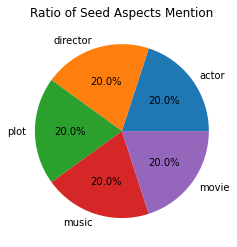

In [24]:
# 
import matplotlib.pyplot as plt

ratio = [actor_appr/total, director_appr/total, plot_appr/total, music_appr/total,movie_appr/total ]
# seed_aspects= ['actor','director','plot','music','movie']

plt.title("Ratio of Seed Aspects Mention")
plt.pie(ratio, labels=seed_aspects, autopct='%.1f%%')
plt.show()

movie 가 압도적으로 많은데 문제될까..? 가령 movie로만 aspect 배정된다던가.

라고 생각했지만 어차피 similirarity기반으로 aspect categorization됨. 즉, actor 의 경우로 이와 유사한, 거리가 가까운 것들은 비슷한 유사도 가짐.

#### 3) seed aspect,word 교집합 등장 횟수

In [9]:

# 빈 word counter 생성 for aspect word, word 교집합 횟수 찾기
word_counts = model.wv.key_to_index.copy()
for key, value in word_counts.items():
    # do something with value
    word_counts[key] = 0
    
# word_counts



In [12]:
with open("aspect_count_music",'rb') as fr:
    df = pickle.load(fr)
df

,w2v_word,w2v_word_count,movie,actor,director,plot,music
0,movie,2490190,4980380,217110,112376,75840,27719
1,film,1370123,2740246,137492,86739,43265,19146
2,actor,852712,1705424,852712,45938,20685,9441
3,one,764921,1529842,89479,38140,23529,8837
4,like,651872,1303744,74104,29590,21100,10236
...,...,...,...,...,...,...,...
98326,lidya,4,8,1,1,0,0
98327,yattering,4,8,1,0,0,0
98328,soojit,4,8,0,0,0,0
98329,tupper,4,8,2,0,0,0


In [13]:
with open("aspect_count_music",'rb') as fr:
    df = pickle.load(fr)

from tqdm import tqdm
tqdm.pandas()
# seed_aspects = ['actor','director','plot','music','movie'] 
seed_aspects = ['movie']  # actor,director 'plot','music' 는 끝
for aspect_word in seed_aspects: 
    print(aspect_word,"하는중")
    
    # 빈 word counter 생성 for aspect word, word 교집합 횟수 찾기
    asp_word_counts = model.wv.key_to_index.copy()
    for key, value in word_counts.items():
        # do something with value
        asp_word_counts[key] = 0

    # 잘 작동 재확인.
    w2v_words = list(model.wv.key_to_index.keys())
    def aspectNword(aspect_word,sent):
        global asp_word_counts
        sent = list(set(sent))
        for w2vword in w2v_words:
            if (aspect_word in sent) and (w2vword in sent):
                try:
                    asp_word_counts[w2vword] += 1
                except: # w2v list에 없는 단어.
                    pass

    pre_df['w2v_review'].progress_apply(lambda sent : aspectNword(aspect_word,sent))


    # aspect dict to df
    sr = pd.Series(data = asp_word_counts)
    aspect_df = sr.to_frame(name = aspect_word)
    aspect_df.reset_index(inplace = True)
    aspect_df[aspect_word]
    # word_counts

    # aspect_word, word 교집합 추가 완료.
    df = pd.concat([df,aspect_df[aspect_word]],axis = 1)
    df
    with open("aspect_count_movie",'wb') as fw:
        pickle.dump(df,fw)
    with open("aspect_count_movie",'rb') as fr:
        df = pickle.load(fr)

movie 하는중


100%|█████████████████████████████████████████████████████████████████████| 9073573/9073573 [40:49:30<00:00, 61.74it/s]


In [ ]:
import pickle

with open("aspect_count_movie",'rb') as fr:
    df = pickle.load(fr)

In [14]:
with open("aspect_count_movie",'rb') as fr:
    df = pickle.load(fr)
df
    

,w2v_word,w2v_word_count,movie,actor,director,plot,music,movie
0,movie,2490190,4980380,217110,112376,75840,27719,2490190
1,film,1370123,2740246,137492,86739,43265,19146,274944
2,actor,852712,1705424,852712,45938,20685,9441,217110
3,one,764921,1529842,89479,38140,23529,8837,284271
4,like,651872,1303744,74104,29590,21100,10236,257270
...,...,...,...,...,...,...,...,...
98326,lidya,4,8,1,1,0,0,1
98327,yattering,4,8,1,0,0,0,1
98328,soojit,4,8,0,0,0,0,2
98329,tupper,4,8,2,0,0,0,0


In [33]:
df1 = df.iloc[:,:2]
df2 = df.iloc[:,3:]
df = pd.concat([df1,df2],axis = 1)

In [34]:
with open("aspect_count_final",'wb') as fw:
    pickle.dump(df,fw)
with open("aspect_count_final",'rb') as fr:
    df = pickle.load(fr)

#### 4) lift 값 구하기

1), 2) 하고 하셈.


(Aspect 나온 문장에서 word1가 같이 나온 sentence 횟수 / Aspect 나온 sent 횟수)/ word1이 나온 sentence 수  각각 컬럼으로 만들어서 연산

In [ ]:
(df[aspect_word]/Aspect 나온 sent 횟수)/df['w2v_word_count'] # 하면 컬럼 네개 나오겠네. aspect 별.

주의!!!
seed_aspect 에 대해 각자 아래 코드 반복함. 반복지점 표시해놓음.

In [198]:
seed_aspects = ['actor','director','plot','music','movie'] 
seed_aspect = 'movie'

In [199]:
df[seed_aspect] # Aspect 나온 문장에서 word1가 같이 나온 sentence 횟수
# actor,director
df[df['w2v_word'] == seed_aspect][seed_aspect].values[0] # aspect 나온 sent 횟수
# df['w2v_word_count'] # "word1이 나온 sentence 수"
# len(pre_df) #전체 sent 수

2490190

반복 지점.

In [200]:
# Aspect 나온 sent 횟수
aspect_sent_no = df[df['w2v_word'] == seed_aspect][seed_aspect].values[0]

각자 aspect 중 아래 중 하나만 선택.

In [178]:
actor_lift = []
# lift 값은 무조건 0보다 커야함.
def get_lift(row):
    actor_lift.append((row[seed_aspect]/aspect_sent_no)/(row['w2v_word_count']/9073573))
    
    
 
df.progress_apply(lambda row: get_lift(row),axis = 1)
actor_lift_arr = np.array(actor_lift)


100%|█████████████████████████████████████████████████████████████████████████| 98331/98331 [00:01<00:00, 86635.52it/s]


In [182]:
director_lift = []
print(seed_aspect)
def get_lift(row):
    director_lift.append((row[seed_aspect]/aspect_sent_no)/(row['w2v_word_count']/9073573))
 
df.progress_apply(lambda row: get_lift(row),axis = 1)
director_lift_arr = np.array(director_lift)


director


100%|█████████████████████████████████████████████████████████████████████████| 98331/98331 [00:01<00:00, 85449.53it/s]


In [193]:
plot_lift = []
print(seed_aspect)
def get_lift(row):
    plot_lift.append((row[seed_aspect]/aspect_sent_no)/(row['w2v_word_count']/9073573))
 
df.progress_apply(lambda row: get_lift(row),axis = 1)
plot_lift_arr = np.array(plot_lift) 


plot


100%|█████████████████████████████████████████████████████████████████████████| 98331/98331 [00:01<00:00, 82713.07it/s]


In [197]:
music_lift = []
print(seed_aspect)
def get_lift(row):
    music_lift.append((row[seed_aspect]/aspect_sent_no)/(row['w2v_word_count']/9073573))
 
df.progress_apply(lambda row: get_lift(row),axis = 1)
music_lift_arr = np.array(music_lift) 


music


100%|█████████████████████████████████████████████████████████████████████████| 98331/98331 [00:01<00:00, 78498.46it/s]


In [201]:
movie_lift = []
print(seed_aspect)
def get_lift(row):
    movie_lift.append((row[seed_aspect]/aspect_sent_no)/(row['w2v_word_count']/9073573))
 
df.progress_apply(lambda row: get_lift(row),axis = 1)
movie_lift_arr = np.array(movie_lift) 


movie


100%|█████████████████████████████████████████████████████████████████████████| 98331/98331 [00:01<00:00, 85139.43it/s]


In [202]:
lift = np.vstack((actor_lift_arr,director_lift_arr,plot_lift_arr,music_lift_arr,movie_lift_arr))
lift.shape

(5, 98331)

In [203]:
lift # 잘되었나 더블체크 완료.

array([[ 0.92773364,  1.06780964, 10.64084122, ...,  0.        ,
         5.32042061,  0.        ],
       [ 1.32852545,  1.8637328 ,  1.58598291, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.23700293,  1.28257284,  0.98527631, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.0798494 ,  1.35561578,  1.07407285, ...,  0.        ,
         0.        ,  0.        ],
       [ 3.64372719,  0.7311905 ,  0.92773364, ...,  1.82186359,
         0.        ,  1.82186359]])

In [174]:
# with open("lift",'wb') as fw:
#     pickle.dump(lift,fw)
with open("lift",'rb') as fr:
    lift = pickle.load(fr)

### 편차조정

In [216]:
lift
seed_aspects # 'actor', 'director', 'plot', 'music', 'movie' 순서로 행에 해당.


array([3.64372719, 0.7311905 , 0.92773364, ..., 1.82186359, 0.        ,
       1.82186359])

In [238]:
lift[0] 

array([ 0.92773364,  1.06780964, 10.64084122, ...,  0.        ,
        5.32042061,  0.        ])

In [239]:
lift[1] 

array([1.32852545, 1.8637328 , 1.58598291, ..., 0.        , 0.        ,
       0.        ])

In [240]:
aspect_no = 0 # actor
lift[aspect_no] 
mean = lift[aspect_no].mean()
std = lift[aspect_no].std()

arr = np.array([])

for t in lift[aspect_no]:
    arr = np.append(arr,(t-mean)/std)

actor_arr = arr.copy()
actor_arr

array([-0.53412527, -0.45763692,  4.76970699, ..., -1.04071325,
        1.86449687, -1.04071325])

In [241]:
aspect_no = 1 # director
lift[aspect_no] 
mean = lift[aspect_no].mean()
std = lift[aspect_no].std()

arr = np.array([])

for t in lift[aspect_no]:
    arr = np.append(arr,(t-mean)/std)

director_arr = arr.copy()
director_arr

array([-0.16925697,  0.03303031, -0.0719482 , ..., -0.67138724,
       -0.67138724, -0.67138724])

In [242]:
aspect_no = 2 # plot
lift[aspect_no] 
mean = lift[aspect_no].mean()
std = lift[aspect_no].std()

arr = np.array([])

for t in lift[aspect_no]:
    arr = np.append(arr,(t-mean)/std)

plot_arr = arr.copy()
plot_arr

array([-0.02507454, -0.00664929, -0.12685498, ..., -0.52523101,
       -0.52523101, -0.52523101])

In [243]:
aspect_no = 3 # music
lift[aspect_no] 
mean = lift[aspect_no].mean()
std = lift[aspect_no].std()

arr = np.array([])

for t in lift[aspect_no]:
    arr = np.append(arr,(t-mean)/std)

music_arr = arr.copy()
music_arr

array([-0.13594599, -0.08427212, -0.13702841, ..., -0.33829116,
       -0.33829116, -0.33829116])

In [244]:
aspect_no = 4 # movie
lift[aspect_no] 
mean = lift[aspect_no].mean()
std = lift[aspect_no].std()

arr = np.array([])

for t in lift[aspect_no]:
    arr = np.append(arr,(t-mean)/std)

movie_arr = arr.copy()
movie_arr

array([ 4.11520422, -0.46052101, -0.15174296, ...,  1.25297513,
       -1.60925396,  1.25297513])

In [247]:
z_lift = np.vstack((actor_arr, director_arr, plot_arr, music_arr, movie_arr))


In [248]:
with open("z_lift",'wb') as fw:
    pickle.dump(z_lift,fw)
with open("z_lift",'rb') as fr:
    z_lift = pickle.load(fr)

In [249]:
z_lift

array([[-0.53412527, -0.45763692,  4.76970699, ..., -1.04071325,
         1.86449687, -1.04071325],
       [-0.16925697,  0.03303031, -0.0719482 , ..., -0.67138724,
        -0.67138724, -0.67138724],
       [-0.02507454, -0.00664929, -0.12685498, ..., -0.52523101,
        -0.52523101, -0.52523101],
       [-0.13594599, -0.08427212, -0.13702841, ..., -0.33829116,
        -0.33829116, -0.33829116],
       [ 4.11520422, -0.46052101, -0.15174296, ...,  1.25297513,
        -1.60925396,  1.25297513]])

# 5. ATM * z_lift

In [250]:
ATM

array([[0.40169773, 0.34135902, 1.        , ..., 0.41429943, 0.47081256,
        0.52099705],
       [0.43375772, 0.50365853, 0.347701  , ..., 0.37201825, 0.13168524,
        0.36852747],
       [0.3848715 , 0.36618134, 0.19956185, ..., 0.19227424, 0.06826872,
        0.37319568],
       [0.28645107, 0.30613926, 0.20057786, ..., 0.27717882, 0.14545426,
        0.3683098 ],
       [0.99999994, 0.8621377 , 0.40169773, ..., 0.29684043, 0.12285058,
        0.44057852]], dtype=float32)

In [ ]:
# 행렬곱하셈 알아서~

In [254]:
a = np.array([[1,2,3,4],
            [1,1,1,1]])
b = np.array([[1,1,1,4],
            [1,1,1,9]])

In [255]:
np.multiply(a,b)

array([[ 1,  2,  3, 16],
       [ 1,  1,  1,  9]])

In [256]:
z_ATM = np.multiply(ATM,z_lift)

In [257]:
# with open("z_ATM",'wb') as fw:
#     pickle.dump(z_ATM,fw)
with open("z_ATM",'rb') as fr:
    z_ATM = pickle.load(fr)

In [259]:
z_ATM.shape

(5, 98331)

# 6. Aspect Categorization

In [266]:
STM = term_document_csr_mat
STM

<9073573x98331 sparse matrix of type '<class 'numpy.int32'>'
	with 92080773 stored elements in Compressed Sparse Row format>

In [267]:
z_ATM.T.shape

(98331, 5)

In [271]:
z_DSM = STM @ z_ATM.T

In [272]:
import pandas as pd
seed_aspects = ['actor','director','plot','music','movie']
z_DSM = pd.DataFrame(DSM,columns = seed_aspects)

In [273]:
# with open("z_DSM",'wb') as fw:
#     pickle.dump(z_DSM,fw)
with open("z_DSM",'rb') as fr:
    z_DSM = pickle.load(fr)

In [274]:
z_DSM

,actor,director,plot,music,movie
0,2.389360,9.433179,0.710298,-0.299814,7.831917
1,-2.124544,-0.836370,16.536104,-0.381023,5.436779
2,-0.082687,-0.006446,-0.027007,-0.023508,0.251401
3,0.768932,-0.141077,0.073834,-0.048367,0.335190
4,0.128296,-0.266775,0.266382,-0.177085,1.507383
...,...,...,...,...,...
9073568,-0.347090,-0.228813,0.002570,0.512569,0.775891
9073569,0.021397,-0.123469,-0.040070,-0.037550,0.420893
9073570,1.386773,-0.328723,0.261708,1.050759,1.529323
9073571,-0.135563,-0.080004,0.745304,-0.079650,0.102765


In [277]:
# apply로 Aspect Categorization --> 15분. 
from tqdm import tqdm
tqdm.pandas()
# temp = z_DSM.loc[:100].copy()


def Aspect_Naming(row):
    if sum(row == 0) == 5:
        return "none"
    else:
        return row[max(row) == row].keys()[0]

# temp['Aspect_wo_lift'] = temp.progress_apply(lambda row: Aspect_Naming(row) ,axis = 1)

z_DSM['Aspect_wo_lift'] = z_DSM.progress_apply(lambda row: Aspect_Naming(row),axis = 1)


100%|██████████████████████████████████████████████████████████████████████| 9073573/9073573 [27:17<00:00, 5541.54it/s]


In [276]:
z_DSM

,actor,director,plot,music,movie,Aspect_wo_lift
0,2.389360,9.433179,0.710298,-0.299814,7.831917,director
1,-2.124544,-0.836370,16.536104,-0.381023,5.436779,plot
2,-0.082687,-0.006446,-0.027007,-0.023508,0.251401,movie
3,0.768932,-0.141077,0.073834,-0.048367,0.335190,actor
4,0.128296,-0.266775,0.266382,-0.177085,1.507383,movie
...,...,...,...,...,...,...
96,-0.117642,0.175723,0.494894,-0.107373,3.076869,movie
97,-0.225706,0.000296,0.144412,-0.076830,1.143241,movie
98,-0.241515,-0.150789,0.046658,-0.056903,0.569338,movie
99,-0.104951,-0.052265,0.090162,0.589152,0.248023,music


In [278]:
z_DSM.to_csv("[원본]aspect_categorized_w_lift.csv")

In [280]:
z_DSM.to_csv("[woThreshold]aspect_categorized_w_lift.csv")

## ==Threshold Adjustment==

## 1) Without Threshold Adjustment

### sampling

In [284]:
os.chdir(r"C:\Users\ywy\Desktop\min\movie_pred\[lift 없이]Aspect Categorization 샘플")
z_DSM = pd.read_csv("[woThreshold]aspect_categorized_w_lift.csv",index_col = "Unnamed: 0")
z_DSM

,actor,director,plot,music,movie,Aspect_wo_lift
0,2.389360,9.433179,0.710298,-0.299814,7.831917,director
1,-2.124544,-0.836370,16.536104,-0.381023,5.436779,plot
2,-0.082687,-0.006446,-0.027007,-0.023508,0.251401,movie
3,0.768932,-0.141077,0.073834,-0.048367,0.335190,actor
4,0.128296,-0.266775,0.266382,-0.177085,1.507383,movie
...,...,...,...,...,...,...
9073568,-0.347090,-0.228813,0.002570,0.512569,0.775891,movie
9073569,0.021397,-0.123469,-0.040070,-0.037550,0.420893,movie
9073570,1.386773,-0.328723,0.261708,1.050759,1.529323,movie
9073571,-0.135563,-0.080004,0.745304,-0.079650,0.102765,plot


In [288]:
# wo_thresh_sample = z_DSM.sample(n = 100,replace = False)
# wo_thresh_sample.to_csv("wo_thresh_sample.csv")

,actor,director,plot,music,movie,Aspect_wo_lift
8024252,-0.101166,-0.103610,0.258092,0.061482,0.311302,movie
1444495,-0.624961,10.304312,0.428524,-0.202787,1.559112,director
3454020,-0.263915,0.484736,0.047747,0.118238,0.405032,director
3406435,-0.312474,0.021528,0.138275,0.562708,0.121599,music
141644,1.147869,-0.172226,-0.065022,-0.145719,0.328648,actor
...,...,...,...,...,...,...
2167119,-0.309939,-0.037217,-0.027117,-0.066442,0.546712,movie
1400809,-0.298761,0.294449,0.335942,0.636185,-0.014110,music
571632,-0.336295,-0.069869,0.251471,0.038550,0.372442,movie
3740574,0.527514,-0.324782,0.200936,-0.149138,2.045414,movie


### evaluation

In [395]:
import os
os.chdir(r"C:\Users\ywy\Desktop\min\movie_pred\[lift 없이]Aspect Categorization 샘플")
z_DSM = pd.read_csv("[1]wo_thresh_sample.csv",index_col = "Unnamed: 0")

In [396]:
z_DSM

,sent,w2v_review,Aspect_wo_lift,min
3216281,seeing it on the big screen i really felt i wa...,"['seeing', 'big', 'screen', 'really', 'felt', ...",movie,movie
57177,"how , at this years oscars , it was not nomina...","['year', 'oscar', 'nominated', 'best', 'pictur...",movie,actor
4161235,the best thing i can say is how much attention...,"['best', 'thing', 'say', 'much', 'attention', ...",movie,movie
4405966,"really warm, beautiful sceneries, great charac...","['really', 'warm', 'beautiful', 'scenery', 'gr...",movie,movie
6272121,"sometimes, you already knew it from your first...","['sometimes', 'already', 'knew', 'first', 'tho...",movie,none
...,...,...,...,...
892425,"sorry to disappoint that person, but this is a...","['sorry', 'disappoint', 'person', 'anything', ...",movie,movie
83215,"i am a huge movies fan, and will watch almost ...","['huge', 'movie', 'fan', 'watch', 'almost', 'a...",movie,movie
6549488,it may be that they are too busy prejudging th...,"['may', 'busy', 'prejudging', 'movie', 'based'...",actor,none
2985536,a film in which a football player pops steroid...,"['film', 'football', 'player', 'pop', 'steroid...",plot,none


In [397]:
# 예시

y_test = z_DSM['Aspect_wo_lift']
y_pred = z_DSM['min']

#classifier - evaluation metrics 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

cm = confusion_matrix(y_test, y_pred)

print (cm)
print (classification_report(y_test, y_pred))

[[ 0  0  6  0  7  2]
 [ 0  0  2  0  4  4]
 [ 7  1 30  0 11  6]
 [ 4  0  2  0  3  1]
 [ 0  0  0  0  0  0]
 [ 1  0  1  0  6  2]]
              precision    recall  f1-score   support

       actor       0.00      0.00      0.00        15
    director       0.00      0.00      0.00        10
       movie       0.73      0.55      0.62        55
       music       0.00      0.00      0.00        10
        none       0.00      0.00      0.00         0
        plot       0.13      0.20      0.16        10

    accuracy                           0.32       100
   macro avg       0.14      0.12      0.13       100
weighted avg       0.42      0.32      0.36       100



C:\Users\ywy\.conda\envs\tf2py38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ywy\.conda\envs\tf2py38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ywy\.conda\envs\tf2py38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ywy\.conda\envs\tf2py38\lib\si

1

In [ ]:
with open("z_DSM",'rb') as fr:
    z_DSM = pickle.load(fr)

## Thershold Values 분석

### For all the values

In [312]:
# z_DSM의 모든 value 를 추출
vals = np.array([])
vals = np.append(vals,z_DSM[seed_aspects[0]].values)
vals = np.append(vals,z_DSM[seed_aspects[1]].values)
vals = np.append(vals,z_DSM[seed_aspects[2]].values)
vals = np.append(vals,z_DSM[seed_aspects[3]].values)
vals = np.append(vals,z_DSM[seed_aspects[4]].values)


In [316]:
# value 시각화 
vals

array([ 2.38936012, -2.1245445 , -0.08268728, ...,  1.52932271,
        0.10276499,  0.205091  ])

In [328]:
temp = [1,2,3,4,5,1,1,1,1,1,1,1,1,5,5,5,55,5]

C:\Users\ywy\.conda\envs\tf2py38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

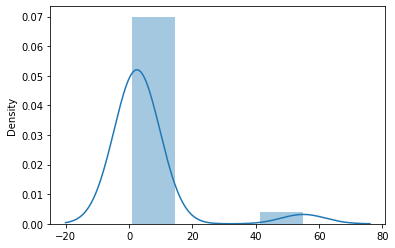

In [360]:
sns.distplot(temp,bins = 4)

C:\Users\ywy\.conda\envs\tf2py38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(-2.0, 2.0)

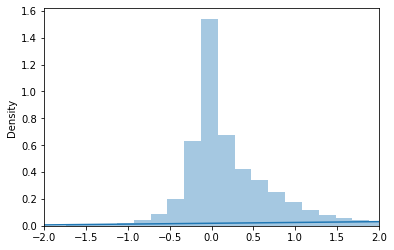

In [368]:
# sns.barplot(data = , x = , y = ,hue = )
sns.distplot(vals,bins = 5000) # bins = 1000
plt.xlim(-2,2)

C:\Users\ywy\.conda\envs\tf2py38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(-2.0, 2.0)

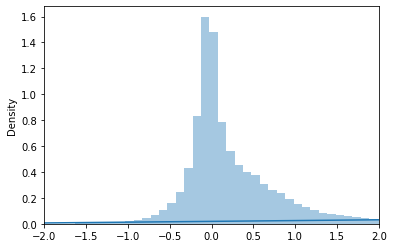

In [369]:
sns.distplot(vals,bins = 10000) # bins = 1000
plt.xlim(-2,2)

C:\Users\ywy\.conda\envs\tf2py38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(-20.0, 20.0)

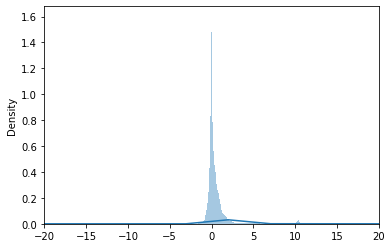

In [370]:
sns.distplot(vals,bins = 10000) # bins = 1000
plt.xlim(-20,20)

In [365]:
vals.mean()

0.507820886094905

### for max only

In [381]:
z_DSM['max'] = z_DSM[['actor', 'director', 'plot', 'music', 'movie']].progress_apply(lambda row: max(row),axis = 1)

100%|████████████████████████████████████████████████████████████████████| 9073573/9073573 [01:04<00:00, 141179.21it/s]


In [384]:
max_val = np.array(z_DSM['max'])

C:\Users\ywy\.conda\envs\tf2py38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(-5.0, 5.0)

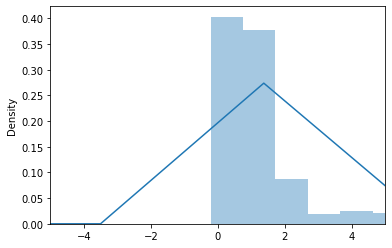

In [385]:
sns.distplot(max_val,bins = 1000) # bins = 1000
plt.xlim(-5,5)

C:\Users\ywy\.conda\envs\tf2py38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(-2.0, 2.0)

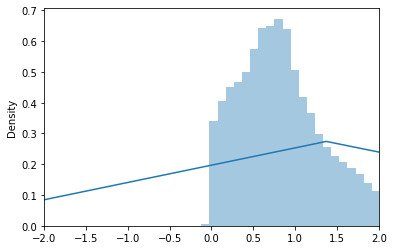

In [386]:
sns.distplot(max_val,bins = 10000) # bins = 1000
plt.xlim(-2,2)

In [387]:
# 10% # 0.23
z_DSM['max'].quantile(q=0.10, interpolation='nearest')

0.2310334229837023

In [388]:
# 25% # 0.53
z_DSM['max'].quantile(q=0.25, interpolation='nearest')


0.5326104626595191

In [318]:
# import matplotlib.pyplot as plt

# plt.bar(vals)

# plt.title('Value spread', fontsize=20)

# plt.xlabel('value', fontsize=18)

# plt.ylabel('how many', fontsize=18)

# plt.xticks(index, label, fontsize=15)

# plt.show()



TypeError: bar() missing 1 required positional argument: 'height'

## Sample 뽑기용 데이터 분석

#### Aspect 비율 확인

In [337]:
z_DSM['Aspect_wo_lift'].value_counts()

movie       5145641
actor       1468315
director     869219
plot         776988
music        705545
none         107865
Name: Aspect_wo_lift, dtype: int64

In [339]:
actor_appr = z_DSM['Aspect_wo_lift'].value_counts()['actor']
director_appr = z_DSM['Aspect_wo_lift'].value_counts()['director']
plot_appr = z_DSM['Aspect_wo_lift'].value_counts()['plot']
music_appr = z_DSM['Aspect_wo_lift'].value_counts()['music']
movie_appr = z_DSM['Aspect_wo_lift'].value_counts()['movie']

total = z_DSM['Aspect_wo_lift'].value_counts().sum()

<ipython-input-341-504cd61d1725>:8: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(ratio, labels=seed_aspects, autopct='%.1f%%')


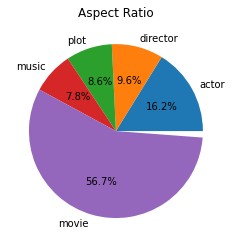

In [341]:
import matplotlib.pyplot as plt
z_DSM['Aspect_wo_lift']

ratio = [actor_appr/total, director_appr/total, plot_appr/total, music_appr/total,movie_appr/total ]
# seed_aspects= ['actor','director','plot','music','movie']

plt.title("Aspect Ratio")
plt.pie(ratio, labels=seed_aspects, autopct='%.1f%%')
plt.show()

In [348]:
aspect_categorized = pd.concat([pre_df,z_DSM['Aspect_wo_lift']],axis =1)
DF = aspect_categorized[['sent','w2v_review','Aspect_wo_lift']].copy()

In [349]:
DF

,sent,w2v_review,Aspect_wo_lift
0,really boring storyline..the acting was sub-pa...,"[really, boring, storyline, acting, sub, par, ...",director
1,this film has so many dream sequence scares th...,"[film, many, dream, sequence, scare, time, som...",plot
2,just a so-so thriller.,[thriller],movie
3,this could have been a decent movie.,"[could, decent, movie]",actor
4,if it was a made for tv movie the acting wasn'...,"[made, movie, acting, bad, story, incredibly, ...",movie
...,...,...,...
9073568,"it picked up were the second left off, and too...","[picked, second, left, took, without, disappoi...",movie
9073569,the only disappointing thing to me was the lac...,"[disappointing, thing, lack, matrix]",movie
9073570,the most enjoyable thing to see in the first t...,"[enjoyable, thing, see, first, two, movie, wat...",movie
9073571,"they were truly missed from this, the final in...","[truly, missed, final, installment, masterpiece]",plot


In [350]:
# Ratio 맞게 샘플 뽑기
movie = DF[DF['Aspect_wo_lift'] == "movie"]
actor = DF[DF['Aspect_wo_lift'] == "actor"]
director = DF[DF['Aspect_wo_lift'] == "director"]
plot = DF[DF['Aspect_wo_lift'] == "plot"]
music = DF[DF['Aspect_wo_lift'] == "music"]

import numpy as np
rand_movie = list(np.random.choice(len(movie),55, replace=False))
rand_actor = list(np.random.choice(len(actor),15, replace=False))
rand_director = list(np.random.choice(len(director),10, replace=False))
rand_plot = list(np.random.choice(len(plot),10, replace=False))
rand_music = list(np.random.choice(len(music),10, replace=False))

In [351]:
sample = pd.concat([movie.iloc[rand_movie],actor.iloc[rand_actor],director.iloc[rand_director],plot.iloc[rand_plot],music.iloc[rand_music]],axis = 0)

In [352]:
sample

,sent,w2v_review,Aspect_wo_lift
7864601,see it if you are ready to and can handle the ...,"[see, ready, handle, raw, emotion, involved]",movie
6981347,"the special effects were amazing, that at some...","[special, effect, amazing, point, forgot, gian...",movie
2587005,i love how they set up the sequel too.i think ...,"[love, set, sequel, think, people, upset, one,...",movie
8929219,callas comes across as the great actress that ...,"[calla, come, across, great, actress]",movie
3185580,"again, clichés and digestible, ""i've heard thi...","[clich, digestible, heard, line, time, movie, ...",movie
...,...,...,...
6953794,i was pleasantly surprised and i was now a har...,"[pleasantly, surprised, harry, potter, fan]",music
594778,worth watching.,"[worth, watching]",music
4822095,the movies talk about the father who trying to...,"[movie, talk, father, trying, tell, story, pas...",music
4174829,but the surgery is expensive and she can only ...,"[surgery, expensive, save, one]",music


In [353]:
# 셔플~
sample = sample.sample(frac=1)
sample.to_csv("[1]wo_thresh_sample.csv")

## 2) Threshold Adjustment 1

threshold : 0.23

In [2]:
import os
os.chdir(r"C:\Users\ywy\Desktop\min\movie_pred\w2v에 나온 단어로만 변환")
with open("z_DSM",'rb') as fr:
    z_DSM = pickle.load(fr)

In [3]:
# apply로 Aspect Categorization --> 15분. 
from tqdm import tqdm
tqdm.pandas()
# temp = z_DSM.loc[:100].copy()


def Aspect_Naming(row):
    if sum(row == 0) == 5:
        return "none"
    elif max(row) > 0.23:
        return row[max(row) == row].keys()[0]
    else:
        return "none"

# temp['Aspect_wo_lift'] = temp.progress_apply(lambda row: Aspect_Naming(row) ,axis = 1)

z_DSM['10per'] = z_DSM.progress_apply(lambda row: Aspect_Naming(row),axis = 1)
z_DSM.to_csv("[Threshold1]aspect_categorized_w_lift.csv")

100%|██████████████████████████████████████████████████████████████████████| 9073573/9073573 [25:19<00:00, 5971.92it/s]


In [7]:
aspect_categorized = pd.concat([pre_df,z_DSM['10per']],axis =1)
DF = aspect_categorized[['sent','w2v_review','10per']].copy()

### sampling

In [10]:
os.chdir(r"C:\Users\ywy\Desktop\min\movie_pred\[lift 없이]Aspect Categorization 샘플")
wo_thresh_sample = pd.read_csv("[1]wo_thresh_sample.csv",index_col = "Unnamed: 0")

sample = DF.loc[wo_thresh_sample.index] # 이전과 같은 index의 샘플.
sample

,sent,w2v_review,10per
3216281,seeing it on the big screen i really felt i wa...,"[seeing, big, screen, really, felt, sitting, w...",movie
57177,"how , at this years oscars , it was not nomina...","[year, oscar, nominated, best, picture, actor,...",movie
4161235,the best thing i can say is how much attention...,"[best, thing, say, much, attention, gave, orig...",movie
4405966,"really warm, beautiful sceneries, great charac...","[really, warm, beautiful, scenery, great, char...",movie
6272121,"sometimes, you already knew it from your first...","[sometimes, already, knew, first, thought, try...",movie
...,...,...,...
892425,"sorry to disappoint that person, but this is a...","[sorry, disappoint, person, anything, annoying]",movie
83215,"i am a huge movies fan, and will watch almost ...","[huge, movie, fan, watch, almost, anything, mi...",movie
6549488,it may be that they are too busy prejudging th...,"[may, busy, prejudging, movie, based, biased, ...",actor
2985536,a film in which a football player pops steroid...,"[film, football, player, pop, steroid, bottle,...",plot


In [11]:
os.chdir(r"C:\Users\ywy\Desktop\min\movie_pred\[lift 없이]Aspect Categorization 샘플")
sample.to_csv("[2]thresh_10%_sample.csv")

In [14]:
sample

,sent,w2v_review,10per
3216281,seeing it on the big screen i really felt i wa...,"[seeing, big, screen, really, felt, sitting, w...",movie
57177,"how , at this years oscars , it was not nomina...","[year, oscar, nominated, best, picture, actor,...",movie
4161235,the best thing i can say is how much attention...,"[best, thing, say, much, attention, gave, orig...",movie
4405966,"really warm, beautiful sceneries, great charac...","[really, warm, beautiful, scenery, great, char...",movie
6272121,"sometimes, you already knew it from your first...","[sometimes, already, knew, first, thought, try...",movie
...,...,...,...
892425,"sorry to disappoint that person, but this is a...","[sorry, disappoint, person, anything, annoying]",movie
83215,"i am a huge movies fan, and will watch almost ...","[huge, movie, fan, watch, almost, anything, mi...",movie
6549488,it may be that they are too busy prejudging th...,"[may, busy, prejudging, movie, based, biased, ...",actor
2985536,a film in which a football player pops steroid...,"[film, football, player, pop, steroid, bottle,...",plot


### evaluation

In [12]:
import os
os.chdir(r"C:\Users\ywy\Desktop\min\movie_pred\[lift 없이]Aspect Categorization 샘플")
z_DSM = pd.read_csv("[2]thresh_10%_sample.csv",index_col = "Unnamed: 0")

In [19]:
# labelled
df = pd.read_csv("[1]wo_thresh_sample.csv",index_col = "Unnamed: 0")
z_DSM = pd.concat([df['min'],z_DSM],axis = 1)
z_DSM

,min,sent,w2v_review,10per
3216281,movie,seeing it on the big screen i really felt i wa...,"['seeing', 'big', 'screen', 'really', 'felt', ...",movie
57177,actor,"how , at this years oscars , it was not nomina...","['year', 'oscar', 'nominated', 'best', 'pictur...",movie
4161235,movie,the best thing i can say is how much attention...,"['best', 'thing', 'say', 'much', 'attention', ...",movie
4405966,movie,"really warm, beautiful sceneries, great charac...","['really', 'warm', 'beautiful', 'scenery', 'gr...",movie
6272121,none,"sometimes, you already knew it from your first...","['sometimes', 'already', 'knew', 'first', 'tho...",movie
...,...,...,...,...
892425,movie,"sorry to disappoint that person, but this is a...","['sorry', 'disappoint', 'person', 'anything', ...",movie
83215,movie,"i am a huge movies fan, and will watch almost ...","['huge', 'movie', 'fan', 'watch', 'almost', 'a...",movie
6549488,none,it may be that they are too busy prejudging th...,"['may', 'busy', 'prejudging', 'movie', 'based'...",actor
2985536,none,a film in which a football player pops steroid...,"['film', 'football', 'player', 'pop', 'steroid...",plot


In [20]:
# 예시

y_test = z_DSM['10per']
y_pred = z_DSM['min']

#classifier - evaluation metrics 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

cm = confusion_matrix(y_test, y_pred)

print (cm)
print (classification_report(y_test, y_pred))

[[ 0  0  6  0  5  2]
 [ 0  0  2  0  4  4]
 [ 7  1 29  0  9  6]
 [ 4  0  2  0  2  1]
 [ 0  0  2  0  9  0]
 [ 1  0  0  0  2  2]]
              precision    recall  f1-score   support

       actor       0.00      0.00      0.00        13
    director       0.00      0.00      0.00        10
       movie       0.71      0.56      0.62        52
       music       0.00      0.00      0.00         9
        none       0.29      0.82      0.43        11
        plot       0.13      0.40      0.20         5

    accuracy                           0.40       100
   macro avg       0.19      0.30      0.21       100
weighted avg       0.41      0.40      0.38       100



C:\Users\ywy\.conda\envs\tf2py38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ywy\.conda\envs\tf2py38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ywy\.conda\envs\tf2py38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 3) Threshold Adjustment 2

threshold: 0.53

In [23]:
import os
os.chdir(r"C:\Users\ywy\Desktop\min\movie_pred\w2v에 나온 단어로만 변환")
with open("z_DSM",'rb') as fr:
    z_DSM = pickle.load(fr)

In [24]:
# apply로 Aspect Categorization --> 15분. 
from tqdm import tqdm
tqdm.pandas()
# temp = z_DSM.loc[:100].copy()


def Aspect_Naming(row):
    if sum(row == 0) == 5:
        return "none"
    elif max(row) > 0.53:
        return row[max(row) == row].keys()[0]
    else:
        return "none"

# temp['Aspect_wo_lift'] = temp.progress_apply(lambda row: Aspect_Naming(row) ,axis = 1)

z_DSM['25per'] = z_DSM.progress_apply(lambda row: Aspect_Naming(row),axis = 1)
z_DSM.to_csv("[Threshold2]aspect_categorized_w_lift.csv")

100%|██████████████████████████████████████████████████████████████████████| 9073573/9073573 [22:53<00:00, 6605.51it/s]


In [25]:
aspect_categorized = pd.concat([pre_df,z_DSM['25per']],axis =1)
DF = aspect_categorized[['sent','w2v_review','25per']].copy()

### sampling

In [26]:
os.chdir(r"C:\Users\ywy\Desktop\min\movie_pred\[lift 없이]Aspect Categorization 샘플")
wo_thresh_sample = pd.read_csv("[1]wo_thresh_sample.csv",index_col = "Unnamed: 0")

sample = DF.loc[wo_thresh_sample.index] # 이전과 같은 index의 샘플.
sample

,sent,w2v_review,25per
3216281,seeing it on the big screen i really felt i wa...,"[seeing, big, screen, really, felt, sitting, w...",movie
57177,"how , at this years oscars , it was not nomina...","[year, oscar, nominated, best, picture, actor,...",movie
4161235,the best thing i can say is how much attention...,"[best, thing, say, much, attention, gave, orig...",movie
4405966,"really warm, beautiful sceneries, great charac...","[really, warm, beautiful, scenery, great, char...",movie
6272121,"sometimes, you already knew it from your first...","[sometimes, already, knew, first, thought, try...",movie
...,...,...,...
892425,"sorry to disappoint that person, but this is a...","[sorry, disappoint, person, anything, annoying]",movie
83215,"i am a huge movies fan, and will watch almost ...","[huge, movie, fan, watch, almost, anything, mi...",movie
6549488,it may be that they are too busy prejudging th...,"[may, busy, prejudging, movie, based, biased, ...",actor
2985536,a film in which a football player pops steroid...,"[film, football, player, pop, steroid, bottle,...",plot


In [27]:
os.chdir(r"C:\Users\ywy\Desktop\min\movie_pred\[lift 없이]Aspect Categorization 샘플")
sample.to_csv("[3]thresh_25%_sample.csv")

### evaluation

In [28]:
import os
os.chdir(r"C:\Users\ywy\Desktop\min\movie_pred\[lift 없이]Aspect Categorization 샘플")
z_DSM = pd.read_csv("[3]thresh_25%_sample.csv",index_col = "Unnamed: 0")

In [29]:
# labelled
df = pd.read_csv("[1]wo_thresh_sample.csv",index_col = "Unnamed: 0")
z_DSM = pd.concat([df['min'],z_DSM],axis = 1)
z_DSM

,min,sent,w2v_review,25per
3216281,movie,seeing it on the big screen i really felt i wa...,"['seeing', 'big', 'screen', 'really', 'felt', ...",movie
57177,actor,"how , at this years oscars , it was not nomina...","['year', 'oscar', 'nominated', 'best', 'pictur...",movie
4161235,movie,the best thing i can say is how much attention...,"['best', 'thing', 'say', 'much', 'attention', ...",movie
4405966,movie,"really warm, beautiful sceneries, great charac...","['really', 'warm', 'beautiful', 'scenery', 'gr...",movie
6272121,none,"sometimes, you already knew it from your first...","['sometimes', 'already', 'knew', 'first', 'tho...",movie
...,...,...,...,...
892425,movie,"sorry to disappoint that person, but this is a...","['sorry', 'disappoint', 'person', 'anything', ...",movie
83215,movie,"i am a huge movies fan, and will watch almost ...","['huge', 'movie', 'fan', 'watch', 'almost', 'a...",movie
6549488,none,it may be that they are too busy prejudging th...,"['may', 'busy', 'prejudging', 'movie', 'based'...",actor
2985536,none,a film in which a football player pops steroid...,"['film', 'football', 'player', 'pop', 'steroid...",plot


In [30]:
# 예시

y_test = z_DSM['25per']
y_pred = z_DSM['min']

#classifier - evaluation metrics 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

cm = confusion_matrix(y_test, y_pred)

print (cm)
print (classification_report(y_test, y_pred))

[[ 0  0  5  0  5  2]
 [ 0  0  1  0  4  2]
 [ 7  0 26  0  6  5]
 [ 3  0  2  0  0  1]
 [ 2  1  7  0 14  3]
 [ 0  0  0  0  2  2]]
              precision    recall  f1-score   support

       actor       0.00      0.00      0.00        12
    director       0.00      0.00      0.00         7
       movie       0.63      0.59      0.61        44
       music       0.00      0.00      0.00         6
        none       0.45      0.52      0.48        27
        plot       0.13      0.50      0.21         4

    accuracy                           0.42       100
   macro avg       0.20      0.27      0.22       100
weighted avg       0.41      0.42      0.41       100



C:\Users\ywy\.conda\envs\tf2py38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ywy\.conda\envs\tf2py38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ywy\.conda\envs\tf2py38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# thereshold 주고 분류 얼마나 잘되나 파악.

# 4. Association Rules

In [ ]:
os.chdir(r'C:\Users\ywy\Desktop\min\movie_pred')
with open("pre_df_w2v",'rb') as fr:
    pre_df = pickle.load(fr)

In [12]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules




In [13]:
# input 작업
dataset = pre_df['w2v_review'].values.tolist()

['actor', 'director', 'plot', 'music', 'movie']